In [108]:
import pandas as pd

# Read the data
data = pd.read_csv('clinical_data.csv')

In [109]:
# Step 1: Overview of the Dataset
print("Dataset Shape:", data.shape)
print("\nDataset Columns:\n", data.columns)
print("\nMissing Values:\n", data.isnull().sum())
print("\nUnique Values per Column:\n", data.nunique())

Dataset Shape: (989, 13)

Dataset Columns:
 Index(['patient_id', 'study_id', 'sex', 'age', 'race', 'histology',
       'smoking_status', 'stage', 'survival_months', 'survival_status',
       'egfr_mutated', 'kras_mutated', 'tp53_mutated'],
      dtype='object')

Missing Values:
 patient_id          0
study_id            0
sex                 0
age                35
race               62
histology           0
smoking_status     18
stage               7
survival_months    34
survival_status     4
egfr_mutated        0
kras_mutated        0
tp53_mutated        0
dtype: int64

Unique Values per Column:
 patient_id         989
study_id             3
sex                  2
age                 79
race                 4
histology            1
smoking_status       2
stage                4
survival_months    781
survival_status      2
egfr_mutated         2
kras_mutated         2
tp53_mutated         2
dtype: int64


In [110]:
# Step 2: Feature Distributions
# Numerical Feature Summary
numerical_features = ["age", "survival_months"]
print("\nSummary Statistics for Numerical Features:\n", data[numerical_features].describe())

# Categorical Feature Summary
categorical_features = ["sex", "race", "smoking_status", "stage", "survival_status"]
for feature in categorical_features:
    print(f"\nValue Counts for {feature}:\n", data[feature].value_counts())


Summary Statistics for Numerical Features:
               age  survival_months
count  954.000000       955.000000
mean    64.718303        38.674407
std     10.289043        33.390188
min     25.000000         0.000000
25%     58.000000        16.000000
50%     66.000000        28.500000
75%     72.000000        53.033333
max     88.000000       238.287800

Value Counts for sex:
 sex
female    564
male      425
Name: count, dtype: int64

Value Counts for race:
 race
caucasian           567
asian               312
african_american     47
other                 1
Name: count, dtype: int64

Value Counts for smoking_status:
 smoking_status
smoker        523
non_smoker    448
Name: count, dtype: int64

Value Counts for stage:
 stage
stage_1    520
stage_2    213
stage_3    205
stage_4     44
Name: count, dtype: int64

Value Counts for survival_status:
 survival_status
0.0    660
1.0    325
Name: count, dtype: int64


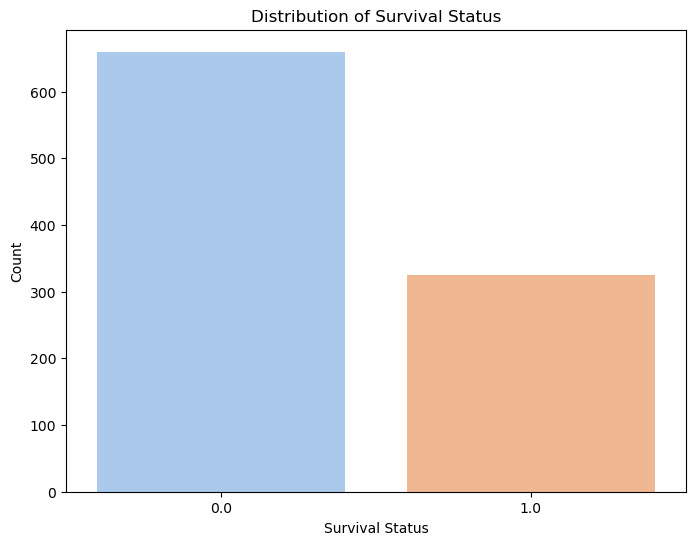

In [111]:
# Step 3: Visualizations
# Target Variable Distribution
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="survival_status", palette="pastel")
plt.title("Distribution of Survival Status")
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.show()

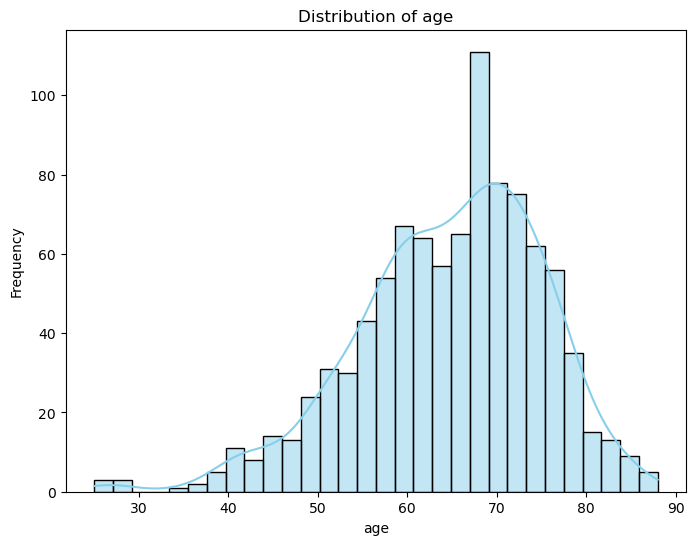

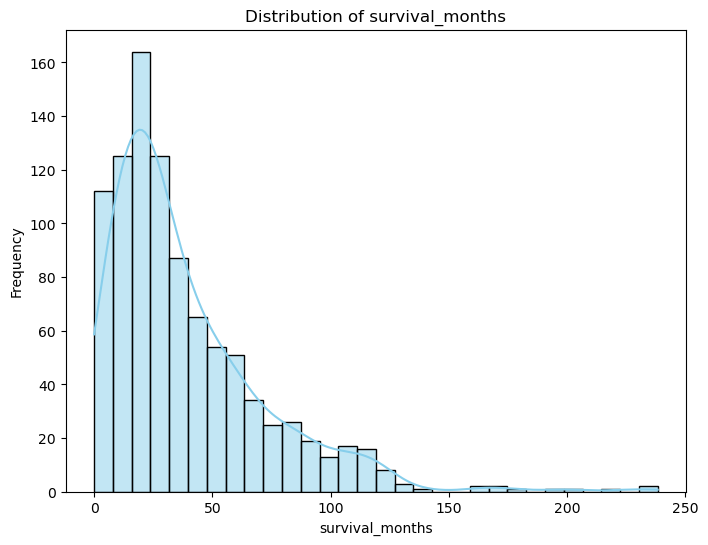

In [112]:
# Numerical Features Distribution
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

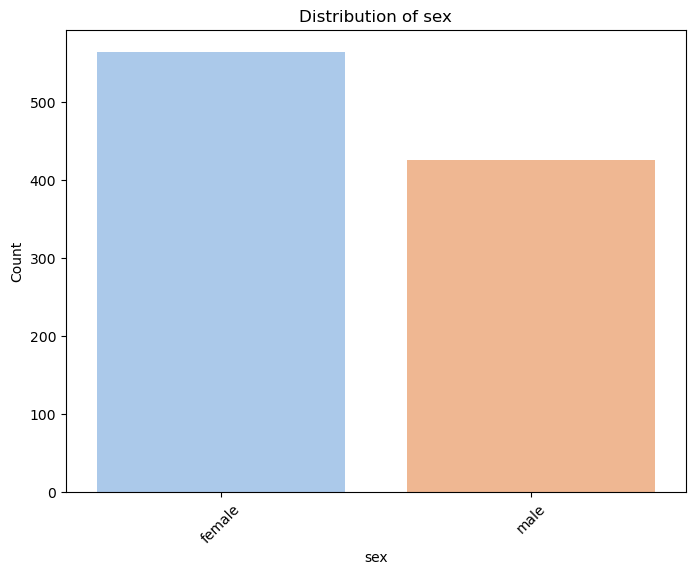

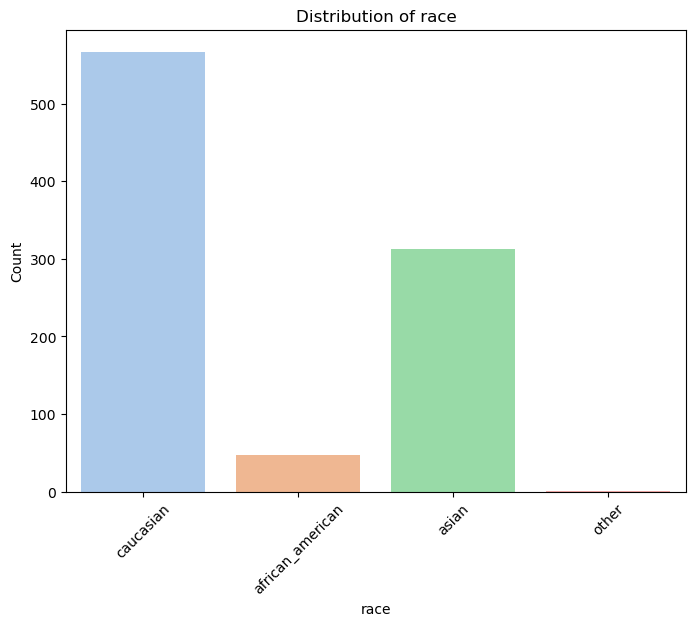

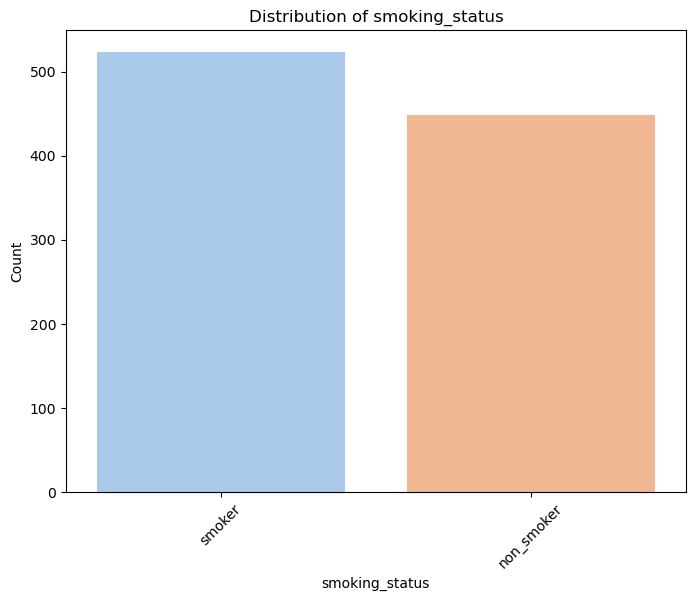

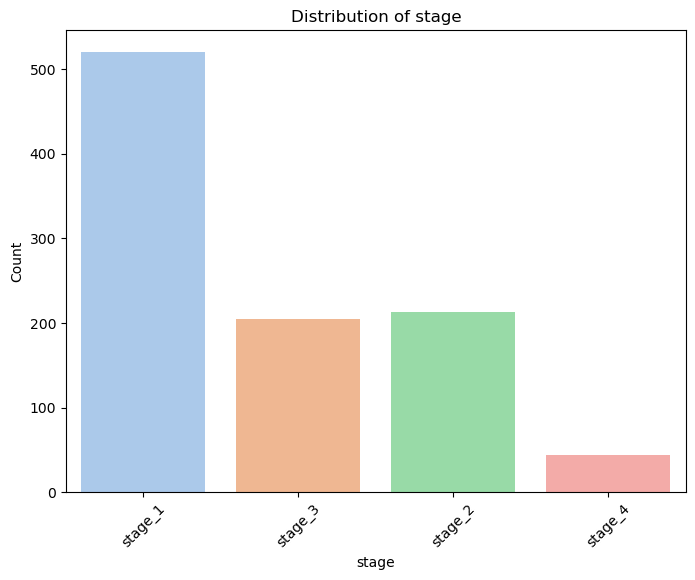

In [113]:
# Categorical Features Distribution
for feature in categorical_features:
    if feature != "survival_status":
        plt.figure(figsize=(8, 6))
        sns.countplot(data=data, x=feature, palette="pastel")
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

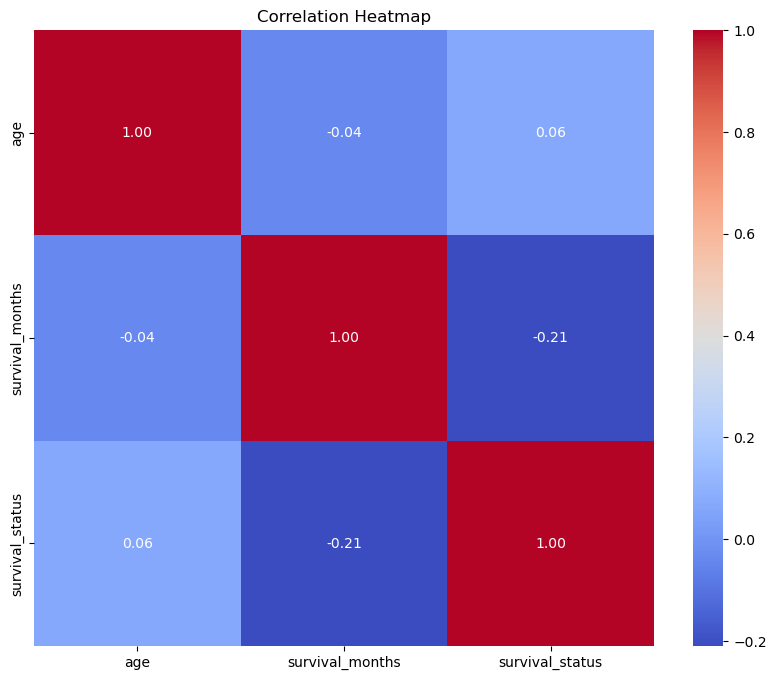

In [114]:
# Step 4: Correlation Analysis
# Correlation Heatmap for Numerical Features
plt.figure(figsize=(10, 8))
corr = data[numerical_features + ["survival_status"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

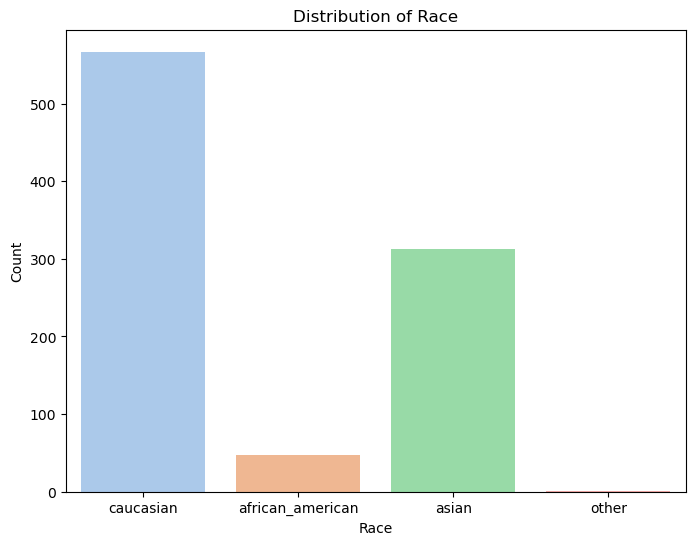

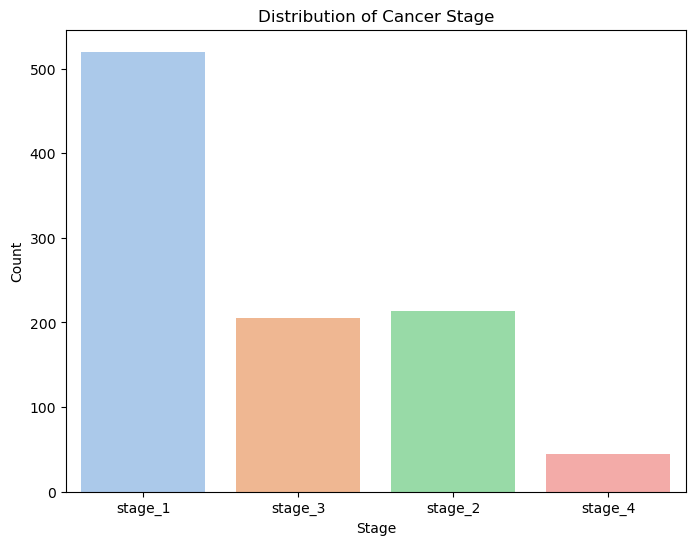

In [115]:
# Step 5: Race and Stage Imbalance Insights
# Insight: Check distributions of 'race' and 'stage'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="race", palette="pastel")
plt.title("Distribution of Race")
plt.xlabel("Race")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="stage", palette="pastel")
plt.title("Distribution of Cancer Stage")
plt.xlabel("Stage")
plt.ylabel("Count")
plt.show()

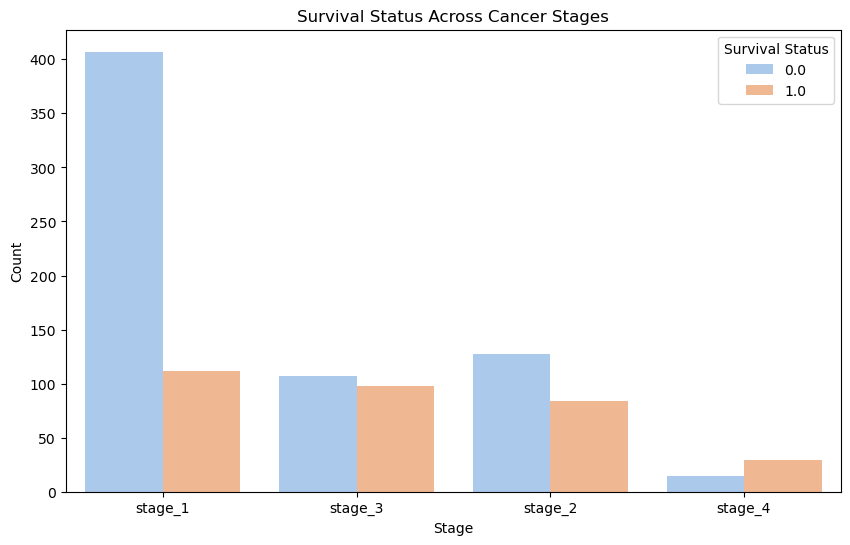

In [116]:
# Insight: Check survival status distribution across stages
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="stage", hue="survival_status", palette="pastel")
plt.title("Survival Status Across Cancer Stages")
plt.xlabel("Stage")
plt.ylabel("Count")
plt.legend(title="Survival Status")
plt.show()

## Unsupervised Models

### Step-1: Data Preparation

In [117]:
# Remove irrelevant features and handle missing data
data = data.drop(columns=["patient_id", "study_id", "histology"])  # Histology has only one unique value
data = data[data["race"] != "other"]  # Remove single example with 'other' in race
data = data.dropna()  # Drop rows with missing values for simplicity

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define feature groups
categorical_features = ["sex", "race", "smoking_status", "stage"]
numerical_features = ["age", "survival_months"]
binary_features = ["egfr_mutated", "kras_mutated", "tp53_mutated"]  # Molecular features

# Remove the target variable and prepare features for clustering
data_for_clustering = data.drop(columns=["survival_status"])

# Create preprocessor with all feature types
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features),
        ("bin", "passthrough", binary_features)  # Binary features don't need encoding
    ]
)

# Preprocess the data for unsupervised learning
X_processed = preprocessor.fit_transform(data_for_clustering)

# Get feature names after preprocessing
onehot_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = (
    list(numerical_features) + 
    list(onehot_features) + 
    list(binary_features)
)

print("Features included in clustering:")
print(f"Numerical features: {numerical_features}")
print(f"Categorical features (one-hot encoded): {list(onehot_features)}")
print(f"Binary molecular features: {binary_features}")
print(f"\nTotal number of features after preprocessing: {len(feature_names)}")

Features included in clustering:
Numerical features: ['age', 'survival_months']
Categorical features (one-hot encoded): ['sex_male', 'race_asian', 'race_caucasian', 'smoking_status_smoker', 'stage_stage_2', 'stage_stage_3', 'stage_stage_4']
Binary molecular features: ['egfr_mutated', 'kras_mutated', 'tp53_mutated']

Total number of features after preprocessing: 12


### Step-2: Feature Engineering

In [118]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["sex", "race", "smoking_status", "stage"]
numerical_features = ["age", "survival_months"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

# preprocess the data for unsupervised learning
X_processed = preprocessor.fit_transform(data)

### Step-3: Optuna Optimization Function

In [119]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
import optuna


def objective(trial, method, X, random_state=42):
    """
    Optuna objective function for optimizing clustering parameters.
    
    Args:
        trial: Optuna trial object
        method: Clustering method ("tsne_hierarchical", "gmm", or "dbscan")
        X: Preprocessed feature matrix
        random_state: Random seed for reproducibility
    
    Returns:
        float: Silhouette score for the clustering
    """
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    try:
        if method == "tsne_hierarchical":
            # t-SNE parameters - optimized for LUAD data characteristics
            # Using higher perplexity range due to dataset size (~1000 samples)
            params = {
                "perplexity": trial.suggest_float("perplexity", 30.0, 50.0),
                "n_clusters": trial.suggest_int("n_clusters", 2, 6),  # Limited by LUAD subtypes
                "learning_rate": trial.suggest_float("learning_rate", 200.0, 1000.0)
            }
            
            # Perform t-SNE
            tsne = TSNE(
                n_components=2,
                perplexity=params["perplexity"],
                learning_rate=params["learning_rate"],
                random_state=random_state
            )
            tsne_embedding = tsne.fit_transform(X_scaled)
            
            # Hierarchical clustering on t-SNE embedding
            linkage_matrix = linkage(tsne_embedding, method='ward')
            labels = fcluster(linkage_matrix, params["n_clusters"], criterion='maxclust')
            
            return silhouette_score(tsne_embedding, labels)
            
        elif method == "gmm":
            # GMM parameters - focused on LUAD molecular subtypes
            params = {
                "n_components": trial.suggest_int("n_components", 2, 6),  # Based on expected LUAD subtypes
                "covariance_type": trial.suggest_categorical("covariance_type", ["full", "tied"]),
                "n_init": trial.suggest_int("n_init", 5, 10)
            }
            
            gmm = GaussianMixture(
                n_components=params["n_components"],
                covariance_type=params["covariance_type"],
                n_init=params["n_init"],
                random_state=random_state
            )
            labels = gmm.fit_predict(X_scaled)
            
            return silhouette_score(X_scaled, labels)
            
        elif method == "dbscan":
            # DBSCAN parameters - adapted for molecular data clustering
            params = {
                "eps": trial.suggest_float("eps", 0.1, 1.0),
                "min_samples": trial.suggest_int("min_samples", 3, 10)
            }
            
            dbscan = DBSCAN(
                eps=params["eps"],
                min_samples=params["min_samples"]
            )
            labels = dbscan.fit_predict(X_scaled)
            
            # Handle case where DBSCAN finds no clusters or all noise points
            if len(np.unique(labels)) < 2 or -1 in labels:
                return float('-inf')
                
            return silhouette_score(X_scaled, labels)
            
    except Exception as e:
        print(f"Error in {method} optimization: {e}")
        return float('-inf')

def optimize_clustering(X, method, n_trials=100, random_state=42):
    """
    Optimize clustering parameters using Optuna.
    
    Args:
        X: Preprocessed feature matrix
        method: Clustering method to optimize
        n_trials: Number of optimization trials
        random_state: Random seed for reproducibility
    
    Returns:
        dict: Best parameters
        float: Best score
    """
    study = optuna.create_study(direction="maximize")
    study.optimize(
        lambda trial: objective(trial, method, X, random_state),
        n_trials=n_trials
    )
    
    return study.best_params, study.best_value

def get_optimal_clusters(X, method, best_params, random_state=42):
    """
    Get cluster assignments using optimized parameters.
    
    Args:
        X: Preprocessed feature matrix
        method: Clustering method
        best_params: Optimized parameters
        random_state: Random seed for reproducibility
    
    Returns:
        array: Cluster labels
    """
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    if method == "tsne_hierarchical":
        tsne = TSNE(
            n_components=2,
            perplexity=best_params["perplexity"],
            learning_rate=best_params["learning_rate"],
            random_state=random_state
        )
        tsne_embedding = tsne.fit_transform(X_scaled)
        linkage_matrix = linkage(tsne_embedding, method='ward')
        return fcluster(linkage_matrix, best_params["n_clusters"], criterion='maxclust')
        
    elif method == "gmm":
        gmm = GaussianMixture(
            n_components=best_params["n_components"],
            covariance_type=best_params["covariance_type"],
            n_init=best_params["n_init"],
            random_state=random_state
        )
        return gmm.fit_predict(X_scaled)
        
    elif method == "dbscan":
        dbscan = DBSCAN(
            eps=best_params["eps"],
            min_samples=best_params["min_samples"]
        )
        return dbscan.fit_predict(X_scaled)

### Step-4: Optimize Models

In [120]:
optuna.logging.set_verbosity(optuna.logging.WARNING) # Suppress Optuna logs

# 1. Optimize t-SNE + Hierarchical clustering
best_params_tsne, best_score_tsne = optimize_clustering(
    X=X_processed,
    method="tsne_hierarchical",
    n_trials=100
)

print("\nt-SNE + Hierarchical Clustering Results:")
print(f"Best Silhouette Score: {best_score_tsne:.3f}")
print("Best Parameters:")
print(f"- Perplexity: {best_params_tsne['perplexity']:.2f}")
print(f"- Number of Clusters: {best_params_tsne['n_clusters']}")
print(f"- Learning Rate: {best_params_tsne['learning_rate']:.2f}")


t-SNE + Hierarchical Clustering Results:
Best Silhouette Score: 0.611
Best Parameters:
- Perplexity: 33.58
- Number of Clusters: 6
- Learning Rate: 635.55


In [121]:
# 2. Optimize Gaussian Mixture Model (GMM)
best_params_gmm, best_score_gmm = optimize_clustering(
    X=X_processed,
    method="gmm",
    n_trials=100
)

print("\nGMM Clustering Results:")
print(f"Best Silhouette Score: {best_score_gmm:.3f}")
print("Best Parameters:")
print(f"- Number of Components: {best_params_gmm['n_components']}")
print(f"- Covariance Type: {best_params_gmm['covariance_type']}")
print(f"- Number of Initializations: {best_params_gmm['n_init']}")


GMM Clustering Results:
Best Silhouette Score: 0.251
Best Parameters:
- Number of Components: 6
- Covariance Type: full
- Number of Initializations: 7


In [122]:
# 3. Optimize DBSCAN
best_params_dbscan, best_score_dbscan = optimize_clustering(
    X=X_processed,
    method="dbscan",
    n_trials=100
)

print("\nDBSCAN Clustering Results:")
print(f"Best Silhouette Score: {best_score_dbscan:.3f}")
print("Best Parameters:")
print(f"- Epsilon: {best_params_dbscan['eps']:.3f}")
print(f"- Min Samples: {best_params_dbscan['min_samples']}")


DBSCAN Clustering Results:
Best Silhouette Score: -inf
Best Parameters:
- Epsilon: 0.787
- Min Samples: 5


### Step-5: Evaluation

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
from lifelines import KaplanMeierFitter  # For survival analysis
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

def evaluate_clustering(clusters, X, feature_names, model_name, clinical_data=None):
    """
    Evaluates a clustering model by:
    - Printing clustering quality metrics
    - Plotting cluster distributions
    - Visualizing feature importance per cluster
    - Analyzing clinical associations (if provided)
    
    Args:
        clusters: Array of cluster assignments
        X: Feature matrix used for clustering
        feature_names: List of feature names
        model_name: Name of clustering model
        clinical_data: Optional DataFrame with clinical variables (survival, stage, etc.)
    """
    print(f"\nEvaluating {model_name}...")
    
    # Handle potential noise points from DBSCAN
    valid_mask = clusters != -1
    X_valid = X[valid_mask]
    clusters_valid = clusters[valid_mask]
    
    if len(np.unique(clusters_valid)) < 2:
        print("Error: Less than 2 valid clusters found.")
        return
    
    # 1. Calculate clustering quality metrics
    print("\nClustering Quality Metrics:")
    metrics = {
        'Silhouette Score': silhouette_score(X_valid, clusters_valid),
        'Calinski-Harabasz Score': calinski_harabasz_score(X_valid, clusters_valid),
        'Davies-Bouldin Score': davies_bouldin_score(X_valid, clusters_valid)
    }
    for metric, score in metrics.items():
        print(f"{metric}: {score:.3f}")
    
    # 2. Plot cluster size distribution
    plt.figure(figsize=(10, 5))
    cluster_counts = pd.Series(clusters).value_counts().sort_index()
    sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
    plt.title(f"Cluster Size Distribution - {model_name}")
    plt.xlabel("Cluster")
    plt.ylabel("Number of Samples")
    plt.show()
    
    # 3. PCA visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    variance_ratio = pca.explained_variance_ratio_
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
    plt.xlabel(f'PC1 ({variance_ratio[0]:.1%} variance explained)')
    plt.ylabel(f'PC2 ({variance_ratio[1]:.1%} variance explained)')
    plt.title(f'PCA Visualization of Clusters - {model_name}')
    plt.colorbar(scatter, label='Cluster')
    plt.show()
    
    # 4. Feature distribution across clusters
    plt.figure(figsize=(12, 6))
    cluster_features = pd.DataFrame(X, columns=feature_names)
    cluster_features['Cluster'] = clusters
    
    # Calculate mean feature values per cluster
    cluster_means = cluster_features.groupby('Cluster').mean()
    
    # Create heatmap
    sns.heatmap(cluster_means, annot=True, fmt='.2f', cmap='YlOrRd', center=0)
    plt.title(f'Feature Means by Cluster - {model_name}')
    plt.show()
    
    # 5. If clinical data is provided, analyze associations
    if clinical_data is not None:
        print("\nClinical Associations:")
        
        # Create contingency tables and perform chi-square tests
        categorical_vars = ['stage', 'smoking_status', 'sex', 'race']
        for var in categorical_vars:
            if var in clinical_data.columns:
                # Create contingency table
                cont_table = pd.crosstab(clusters, clinical_data[var])
                
                # Perform chi-square test
                chi2, p_value, _, _ = chi2_contingency(cont_table)
                
                print(f"\n{var.title()} Distribution:")
                print(f"Chi-square p-value: {p_value:.3f}")
                
                # Plot distribution
                plt.figure(figsize=(10, 6))
                cont_table_norm = cont_table.div(cont_table.sum(axis=1), axis=0)
                cont_table_norm.plot(kind='bar', stacked=True)
                plt.title(f'{var.title()} Distribution by Cluster')
                plt.xlabel('Cluster')
                plt.ylabel('Proportion')
                plt.legend(title=var.title(), bbox_to_anchor=(1.05, 1))
                plt.tight_layout()
                plt.show()
        
        # Analyze survival if available
        if 'survival_months' in clinical_data.columns and 'survival_status' in clinical_data.columns:
            from lifelines import KaplanMeierFitter
            
            plt.figure(figsize=(10, 6))
            kmf = KaplanMeierFitter()
            
            for cluster in np.unique(clusters):
                mask = clusters == cluster
                if sum(mask) > 0:  # Only plot if cluster has samples
                    kmf.fit(
                        clinical_data.loc[mask, 'survival_months'],
                        clinical_data.loc[mask, 'survival_status'],
                        label=f'Cluster {cluster}'
                    )
                    kmf.plot()
            
            plt.title(f'Survival Analysis by Cluster - {model_name}')
            plt.xlabel('Time (months)')
            plt.ylabel('Survival probability')
            plt.grid(True)
            plt.show()

In [124]:
# Get cluster assignments
tsne_clusters = get_optimal_clusters(
    X=X_processed,
    method="tsne_hierarchical",
    best_params=best_params_tsne
)

# Get GMM cluster assignments
gmm_clusters = get_optimal_clusters(
    X=X_processed,
    method="gmm",
    best_params=best_params_gmm
)

# Get DBSCAN cluster assignments
dbscan_clusters = get_optimal_clusters(
    X=X_processed,
    method="dbscan",
    best_params=best_params_dbscan
)

In [125]:
feature_names = [
    'age', 'survival_months',          # From numerical features
    'sex_male',                        # From sex encoding
    'race_asian', 'race_caucasian',    # From race encoding
    'smoking_status_smoker',           # From smoking_status encoding
    'stage_stage_2', 'stage_stage_3', 'stage_stage_4'  # From stage encoding
]


Evaluating t-SNE Hierarchical Clustering...

Clustering Quality Metrics:
Silhouette Score: 0.076
Calinski-Harabasz Score: 63.663
Davies-Bouldin Score: 2.711


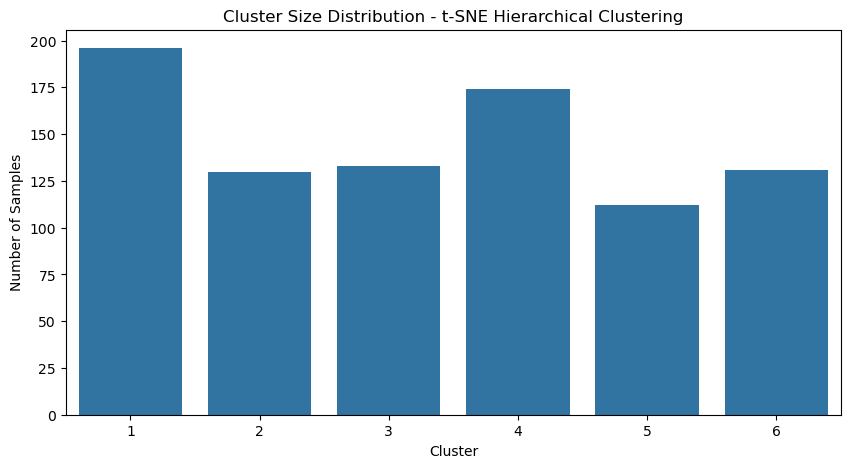

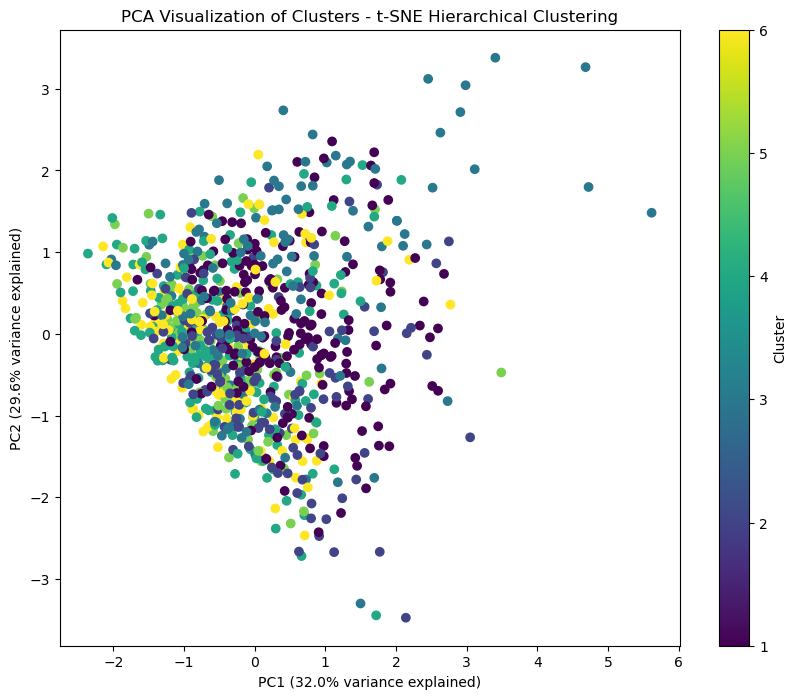

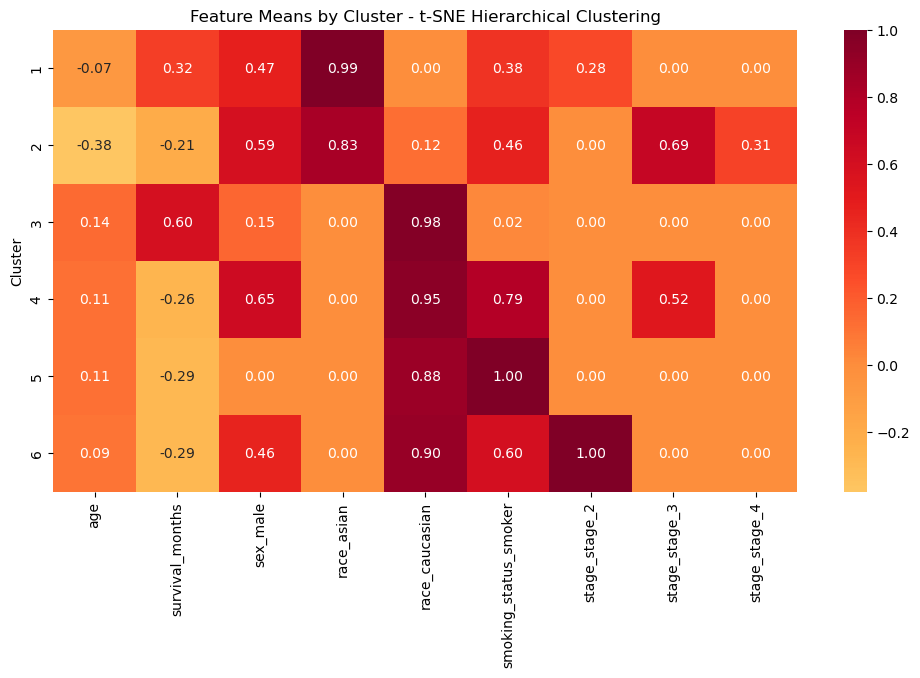


Clinical Associations:

Stage Distribution:
Chi-square p-value: 0.000


<Figure size 1000x600 with 0 Axes>

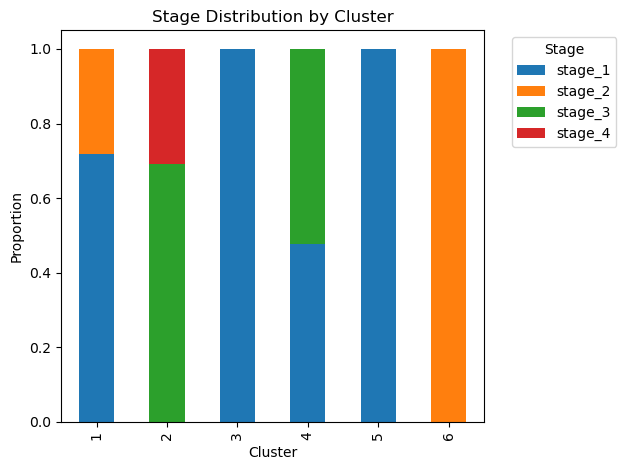


Smoking_Status Distribution:
Chi-square p-value: 0.000


<Figure size 1000x600 with 0 Axes>

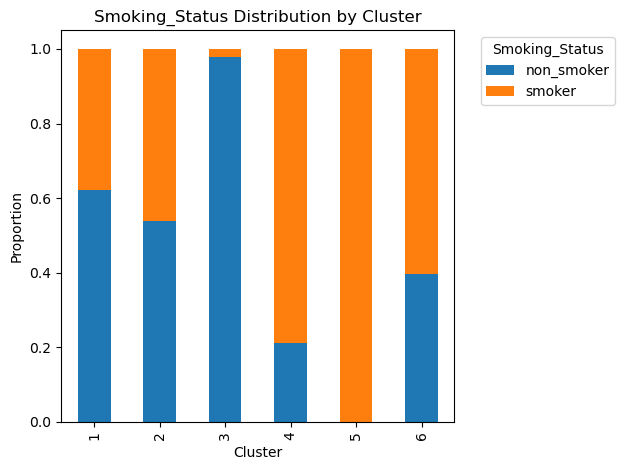


Sex Distribution:
Chi-square p-value: 0.000


<Figure size 1000x600 with 0 Axes>

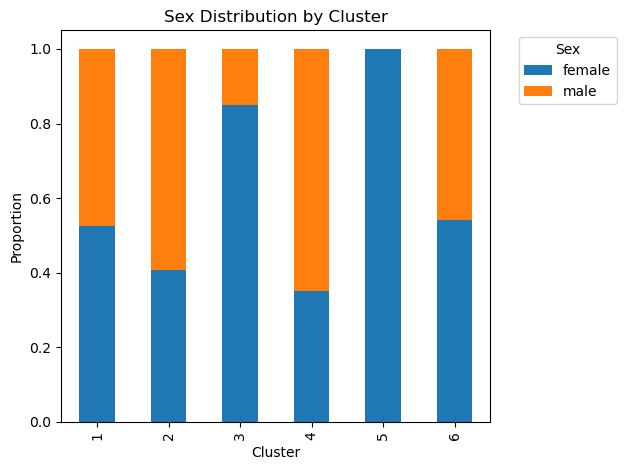


Race Distribution:
Chi-square p-value: 0.000


<Figure size 1000x600 with 0 Axes>

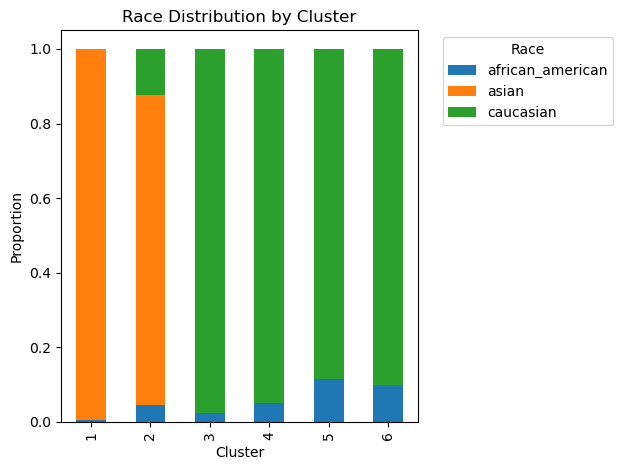

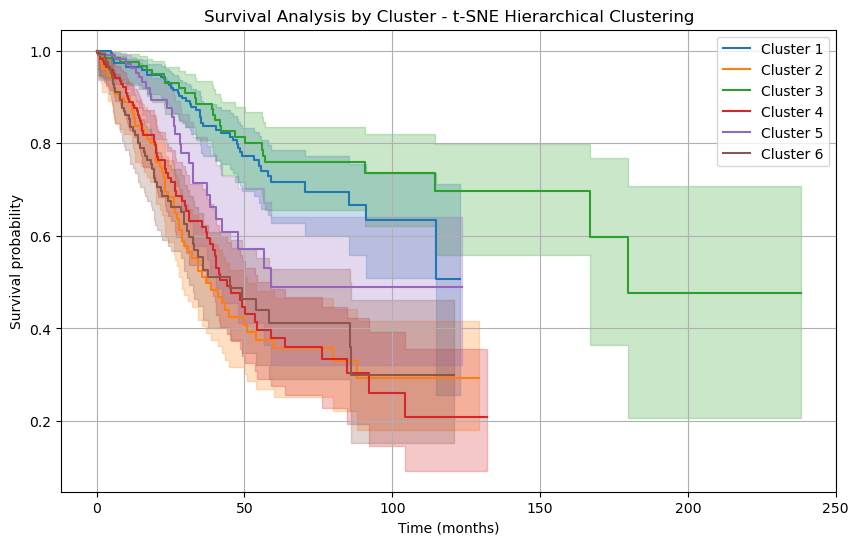

In [126]:
# 1. Evaluate t-SNE + Hierarchical clustering results
evaluate_clustering(
    clusters=tsne_clusters,
    X=X_processed,
    feature_names=feature_names,
    model_name="t-SNE Hierarchical Clustering",
    clinical_data=data
)


Evaluating Gaussian Mixture Model...

Clustering Quality Metrics:
Silhouette Score: 0.113
Calinski-Harabasz Score: 64.737
Davies-Bouldin Score: 2.472


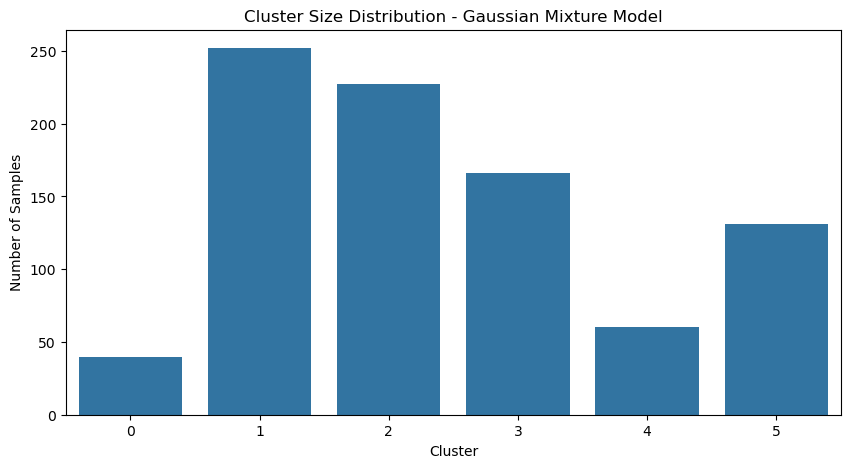

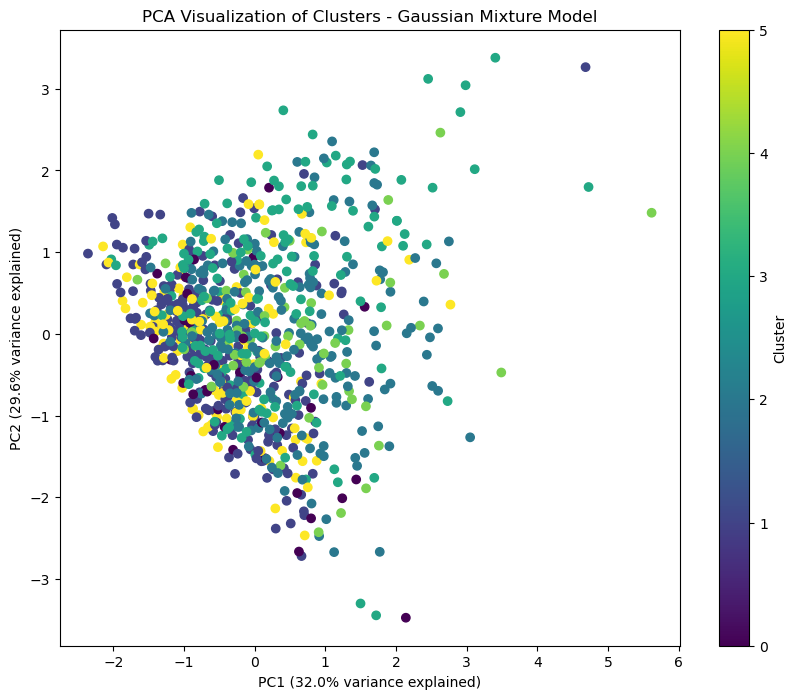

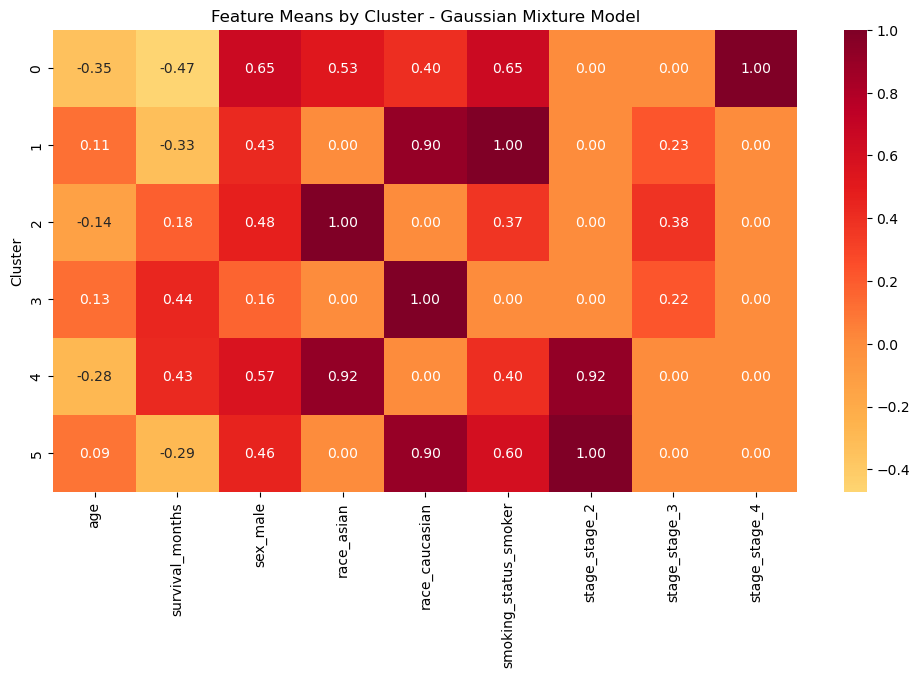


Clinical Associations:

Stage Distribution:
Chi-square p-value: 0.000


<Figure size 1000x600 with 0 Axes>

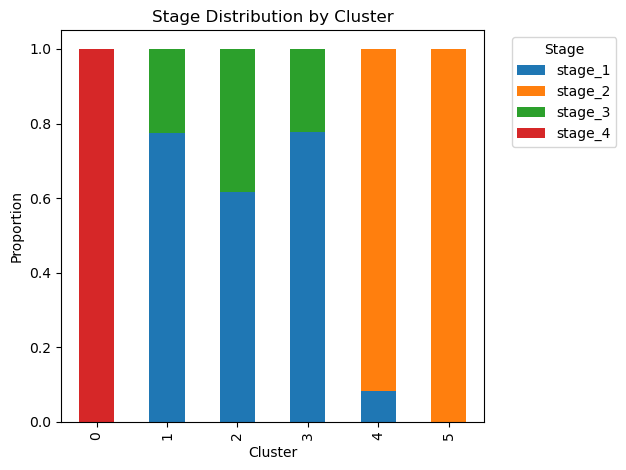


Smoking_Status Distribution:
Chi-square p-value: 0.000


<Figure size 1000x600 with 0 Axes>

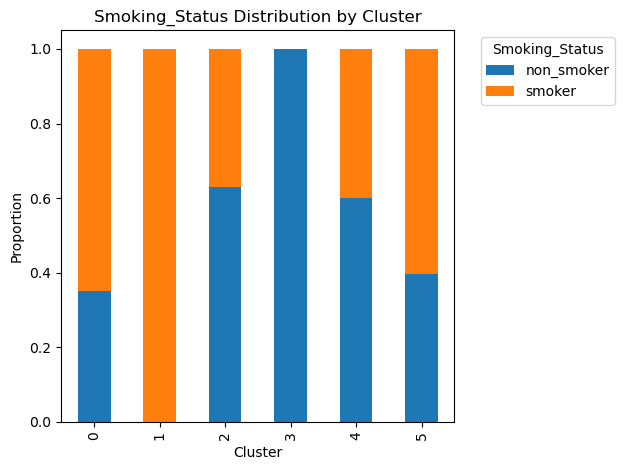


Sex Distribution:
Chi-square p-value: 0.000


<Figure size 1000x600 with 0 Axes>

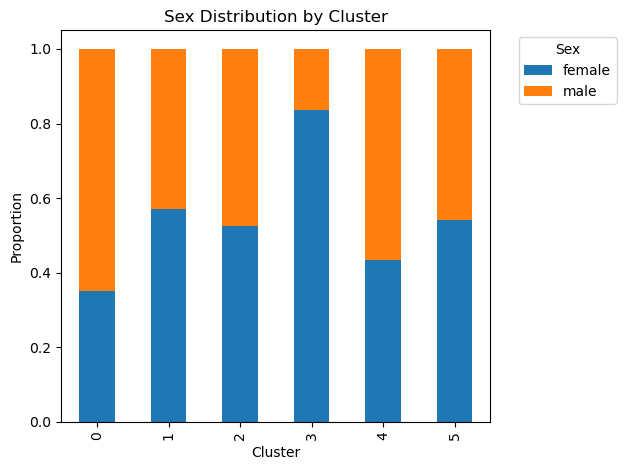


Race Distribution:
Chi-square p-value: 0.000


<Figure size 1000x600 with 0 Axes>

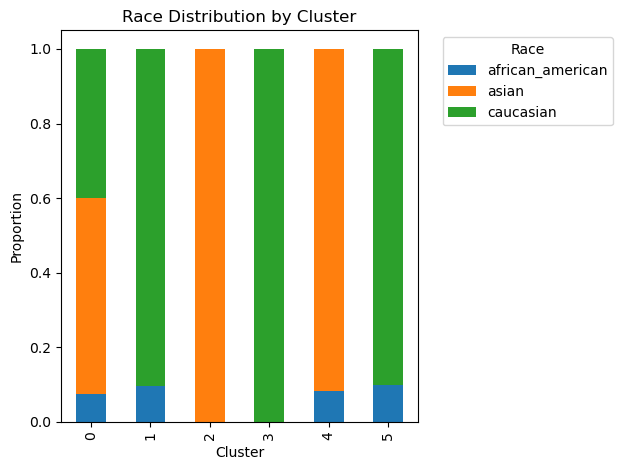

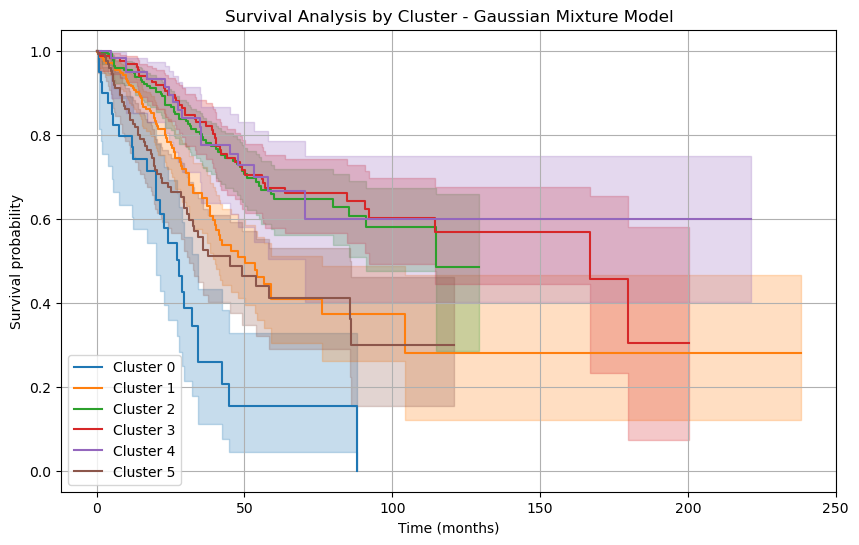

In [127]:
# 2. Evaluate GMM clustering
evaluate_clustering(
    clusters=gmm_clusters,
    X=X_processed,
    feature_names=feature_names,
    model_name="Gaussian Mixture Model",
    clinical_data=data
)


Evaluating DBSCAN...

Clustering Quality Metrics:
Silhouette Score: 0.137
Calinski-Harabasz Score: 37.256
Davies-Bouldin Score: 1.649


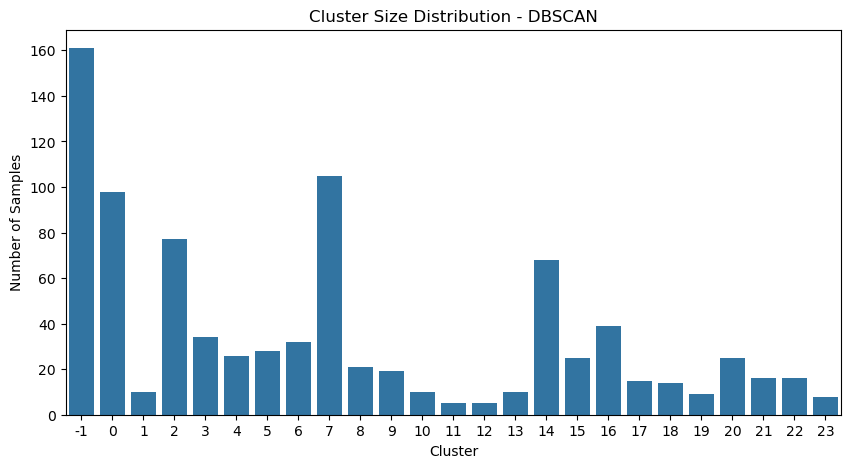

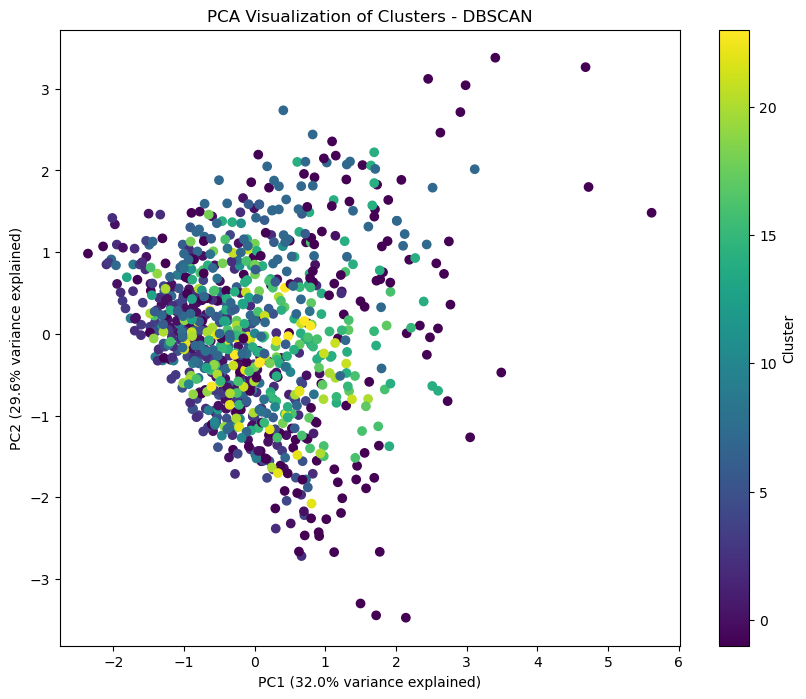

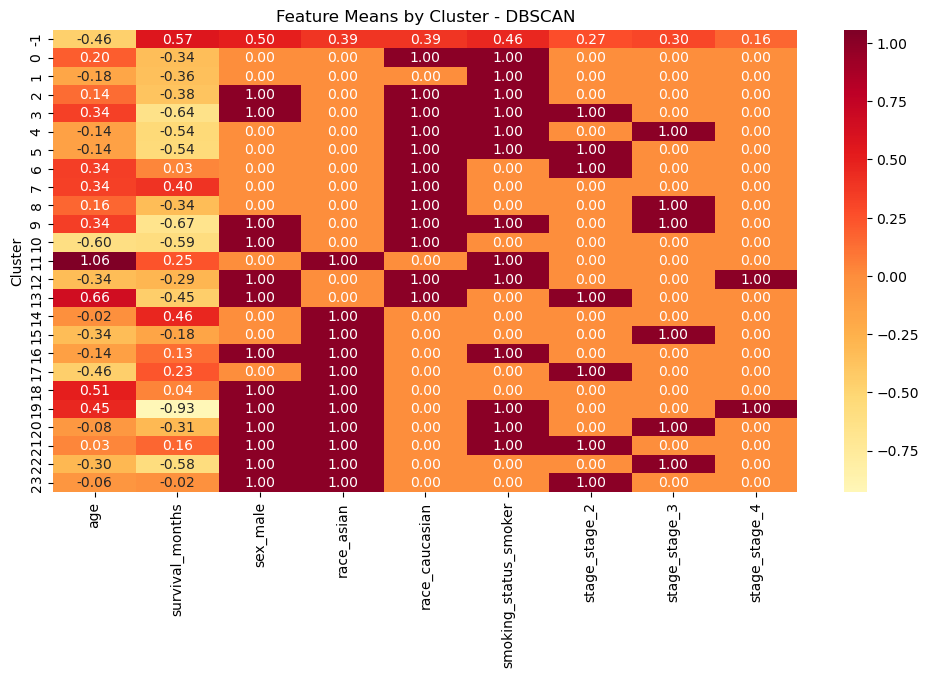


Clinical Associations:

Stage Distribution:
Chi-square p-value: 0.000


<Figure size 1000x600 with 0 Axes>

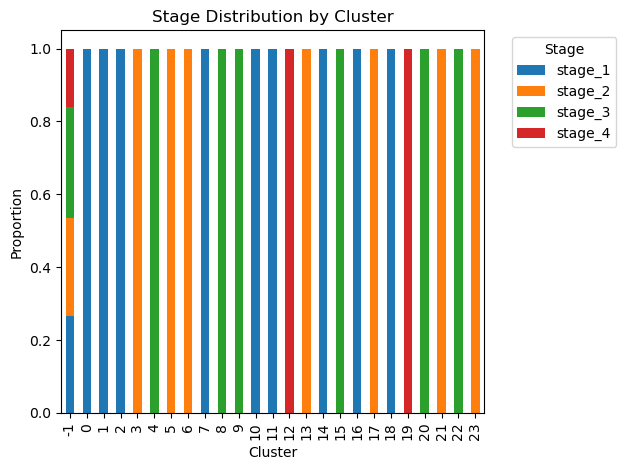


Smoking_Status Distribution:
Chi-square p-value: 0.000


<Figure size 1000x600 with 0 Axes>

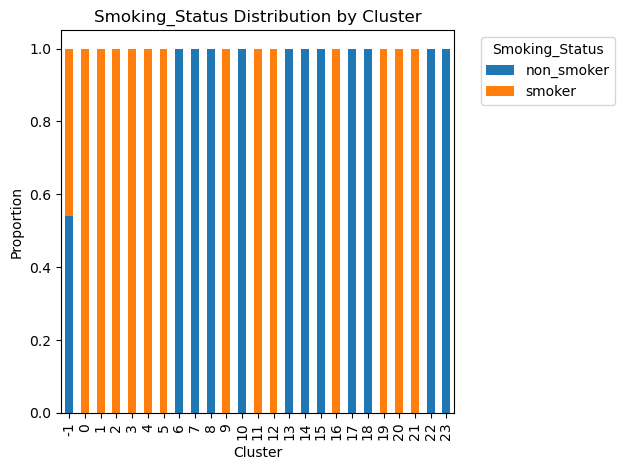


Sex Distribution:
Chi-square p-value: 0.000


<Figure size 1000x600 with 0 Axes>

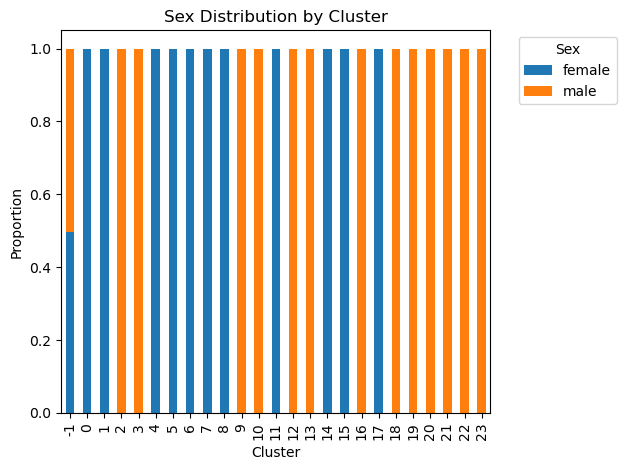


Race Distribution:
Chi-square p-value: 0.000


<Figure size 1000x600 with 0 Axes>

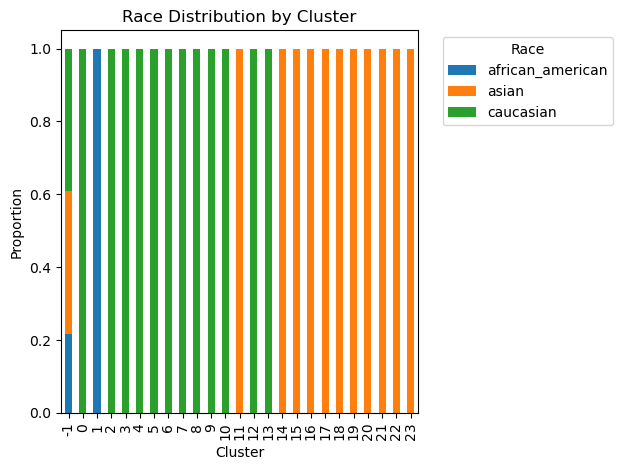

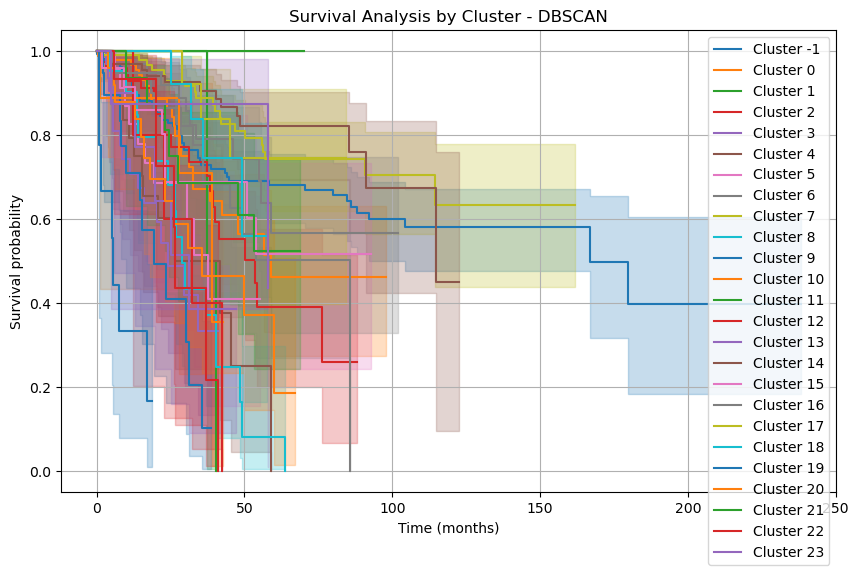

In [128]:
# 3. Evaluate DBSCAN clustering
evaluate_clustering(
    clusters=dbscan_clusters,
    X=X_processed,
    feature_names=feature_names,
    model_name="DBSCAN",
    clinical_data=data
)

### Step-6: SHAP Analysis

In [129]:
import shap
from sklearn.ensemble import RandomForestClassifier

def plot_feature_importance(features, importance_values, title):
    """Helper function to plot feature importance"""
    # Ensure equal lengths
    if len(features) != len(importance_values):
        min_len = min(len(features), len(importance_values))
        features = features[:min_len]
        importance_values = importance_values[:min_len]
    
    # Create DataFrame
    df = pd.DataFrame({'Feature': features, 'Importance': importance_values})
    df = df.sort_values('Importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(12, 8))
    plt.bar(range(len(df)), df['Importance'])
    plt.xticks(range(len(df)), df['Feature'], rotation=45, ha='right')
    plt.title(title)
    plt.tight_layout()
    plt.show()
    
    return df

def perform_shap_analysis(X, clusters, feature_names, clinical_data=None, model_name=""):
    """
    Performs SHAP analysis to explain cluster assignments
    """
    print(f"\nPerforming SHAP Analysis for {model_name}...")
    
    # Handle potential noise points from DBSCAN
    valid_mask = clusters != -1
    X_valid = X[valid_mask]
    clusters_valid = clusters[valid_mask]
    
    if len(np.unique(clusters_valid)) < 2:
        print("Error: Less than 2 valid clusters found.")
        return None, None
    
    # Convert sparse matrix to dense if necessary
    if hasattr(X_valid, "toarray"):
        X_valid = X_valid.toarray()
    
    # Ensure X_valid is a 2D numpy array
    X_valid = np.array(X_valid)
    
    # Verify and adjust feature names if necessary
    if len(feature_names) != X_valid.shape[1]:
        print(f"Warning: Feature names length ({len(feature_names)}) doesn't match data shape ({X_valid.shape[1]})")
        feature_names = [f"Feature_{i}" for i in range(X_valid.shape[1])]
    
    # Train Random Forest classifier on cluster assignments
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_valid, clusters_valid)
    
    # Plot Random Forest feature importances
    plot_feature_importance(
        features=feature_names,
        importance_values=rf_model.feature_importances_,
        title=f"Random Forest Feature Importances ({model_name})"
    )
    
    # Calculate SHAP values
    explainer = shap.TreeExplainer(rf_model)
    shap_values = explainer.shap_values(X_valid)
    
    # Handle different clustering scenarios
    if len(np.unique(clusters_valid)) == 2:
        # Binary classification case
        if isinstance(shap_values, list):
            shap_values = shap_values[1]
        
        # Calculate and plot absolute SHAP values
        mean_abs_shap = np.abs(shap_values).mean(0)
        plot_feature_importance(
            features=feature_names,
            importance_values=mean_abs_shap,
            title=f'SHAP Feature Importance - {model_name}'
        )
        
    else:
        # Multiclass case
        n_clusters = len(np.unique(clusters_valid))
        
        for i in range(n_clusters):
            # Calculate mean absolute SHAP values for each cluster
            mean_abs_shap = np.abs(shap_values[i]).mean(0)
            plot_feature_importance(
                features=feature_names,
                importance_values=mean_abs_shap,
                title=f'SHAP Feature Importance - Cluster {i} ({model_name})'
            )
    
    # Analyze specific subgroups if clinical data is provided
    if clinical_data is not None:
        clinical_data = clinical_data.reset_index(drop=True)
        
        # Filter for non-smoker East Asian women
        target_subgroup = (
            (clinical_data['smoking_status'] == 'non_smoker') &
            (clinical_data['race'] == 'asian') &
            (clinical_data['sex'] == 'female')
        )
        
        if sum(target_subgroup) > 0:
            subgroup_mask = target_subgroup & valid_mask
            if sum(subgroup_mask) > 0:
                subgroup_X = X[subgroup_mask]
                if hasattr(subgroup_X, "toarray"):
                    subgroup_X = subgroup_X.toarray()
                
                subgroup_shap = explainer.shap_values(subgroup_X)
                
                if len(np.unique(clusters_valid)) == 2:
                    if isinstance(subgroup_shap, list):
                        subgroup_shap = subgroup_shap[1]
                    
                    mean_abs_shap = np.abs(subgroup_shap).mean(0)
                    plot_feature_importance(
                        features=feature_names,
                        importance_values=mean_abs_shap,
                        title=f'SHAP Feature Importance - Non-smoker East Asian Women ({model_name})'
                    )
                else:
                    for i in range(len(np.unique(clusters_valid))):
                        mean_abs_shap = np.abs(subgroup_shap[i]).mean(0)
                        plot_feature_importance(
                            features=feature_names,
                            importance_values=mean_abs_shap,
                            title=f'SHAP Feature Importance - Cluster {i} - Non-smoker East Asian Women ({model_name})'
                        )
    
    return explainer, shap_values

def analyze_cluster_transitions(tsne_clusters, gmm_clusters, dbscan_clusters, feature_names, X):
    """
    Analyzes how samples transition between different clustering methods
    """
    print("\nAnalyzing cluster transitions...")
    
    # Convert sparse matrix to dense if necessary
    if hasattr(X, "toarray"):
        X = X.toarray()
    X = np.array(X)
    
    print(f"X shape: {X.shape}")
    print(f"Number of feature names: {len(feature_names)}")
    
    # Create a DataFrame with all cluster assignments
    cluster_df = pd.DataFrame({
        'TSNE': tsne_clusters,
        'GMM': gmm_clusters,
        'DBSCAN': dbscan_clusters
    })
    
    # Create pairwise disagreement flags
    disagreements = {
        'TSNE_vs_GMM': (cluster_df['TSNE'] != cluster_df['GMM']).astype(int),
        'TSNE_vs_DBSCAN': (cluster_df['TSNE'] != cluster_df['DBSCAN']).astype(int),
        'GMM_vs_DBSCAN': (cluster_df['GMM'] != cluster_df['DBSCAN']).astype(int)
    }
    
    results = {}
    
    def process_shap_values(shap_values):
        """Helper function to process SHAP values into 1D importance scores"""
        # Handle different SHAP value shapes
        if isinstance(shap_values, list):
            # For multi-class, take the mean across all classes
            mean_abs_shap = np.mean([np.abs(sv).mean(0) for sv in shap_values], axis=0)
        else:
            # For binary classification or already processed values
            if len(shap_values.shape) == 3:
                # If we have (samples, features, classes)
                mean_abs_shap = np.abs(shap_values).mean(axis=(0, 2))
            else:
                # If we have (samples, features)
                mean_abs_shap = np.abs(shap_values).mean(0)
        
        return mean_abs_shap

    def create_and_plot_importance(feature_names, importance_values, title):
        """Helper function to create and plot feature importance"""
        # Ensure importance_values is 1D
        importance_values = np.array(importance_values).ravel()
        
        # Create sorted DataFrame
        temp_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importance_values
        })
        temp_df = temp_df.sort_values('Importance', ascending=True)
        
        # Plot
        plt.figure(figsize=(12, 8))
        plt.barh(range(len(temp_df)), temp_df['Importance'])
        plt.yticks(range(len(temp_df)), temp_df['Feature'])
        plt.xlabel('Feature Importance')
        plt.title(title)
        plt.tight_layout()
        plt.show()
        
        return temp_df
    
    # Analyze each pair of clustering methods
    for comparison, disagree in disagreements.items():
        print(f"\nAnalyzing {comparison}...")
        print(f"Number of disagreements: {sum(disagree)}")
        
        if sum(disagree) > 0:
            # Train Random Forest to predict disagreements
            rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
            rf_model.fit(X, disagree)
            
            # Random Forest importance
            print("\nRandom Forest Feature Importances:")
            importance_df_rf = create_and_plot_importance(
                feature_names=feature_names,
                importance_values=rf_model.feature_importances_,
                title=f'Random Forest Feature Importance - {comparison}'
            )
            print(importance_df_rf.sort_values('Importance', ascending=False).head().to_string())
            
            # Calculate SHAP values
            explainer = shap.TreeExplainer(rf_model)
            shap_values = explainer.shap_values(X)
            print(f"SHAP values shape: {np.array(shap_values).shape}")
            
            # Process SHAP values
            mean_abs_shap = process_shap_values(shap_values)
            print(f"Processed SHAP values shape: {mean_abs_shap.shape}")
            
            # Create, plot and store SHAP importance DataFrame
            importance_df = create_and_plot_importance(
                feature_names=feature_names,
                importance_values=mean_abs_shap,
                title=f'SHAP Feature Importance - {comparison}'
            )
            
            # Store results
            results[comparison] = {
                'explainer': explainer,
                'shap_values': shap_values,
                'importance_df': importance_df,
                'rf_importance_df': importance_df_rf
            }
            
            # Print top features
            print("\nTop 5 features driving differences (SHAP):")
            print(importance_df.sort_values('Importance', ascending=False).head().to_string())
        else:
            print("No disagreements found.")
    
    # Analyze overall disagreement patterns
    any_disagreement = (
        (cluster_df['TSNE'] != cluster_df['GMM']) |
        (cluster_df['TSNE'] != cluster_df['DBSCAN']) |
        (cluster_df['GMM'] != cluster_df['DBSCAN'])
    ).astype(int)
    
    if sum(any_disagreement) > 0:
        print("\nAnalyzing overall disagreement patterns...")
        print(f"Total samples with any disagreement: {sum(any_disagreement)}")
        
        # Train model for overall disagreements
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_model.fit(X, any_disagreement)
        
        # Random Forest importance
        importance_df_rf = create_and_plot_importance(
            feature_names=feature_names,
            importance_values=rf_model.feature_importances_,
            title='Random Forest Feature Importance - Overall'
        )
        
        # Calculate SHAP values
        explainer = shap.TreeExplainer(rf_model)
        shap_values = explainer.shap_values(X)
        
        # Process SHAP values
        mean_abs_shap = process_shap_values(shap_values)
        
        # Create, plot and store SHAP importance DataFrame
        importance_df = create_and_plot_importance(
            feature_names=feature_names,
            importance_values=mean_abs_shap,
            title='SHAP Feature Importance - Overall'
        )
        
        # Store results
        results['overall'] = {
            'explainer': explainer,
            'shap_values': shap_values,
            'importance_df': importance_df,
            'rf_importance_df': importance_df_rf
        }
        
        # Print top features
        print("\nTop 5 features driving overall differences (SHAP):")
        print(importance_df.sort_values('Importance', ascending=False).head().to_string())
    
    return results


Performing SHAP Analysis for t-SNE Hierarchical Clustering...


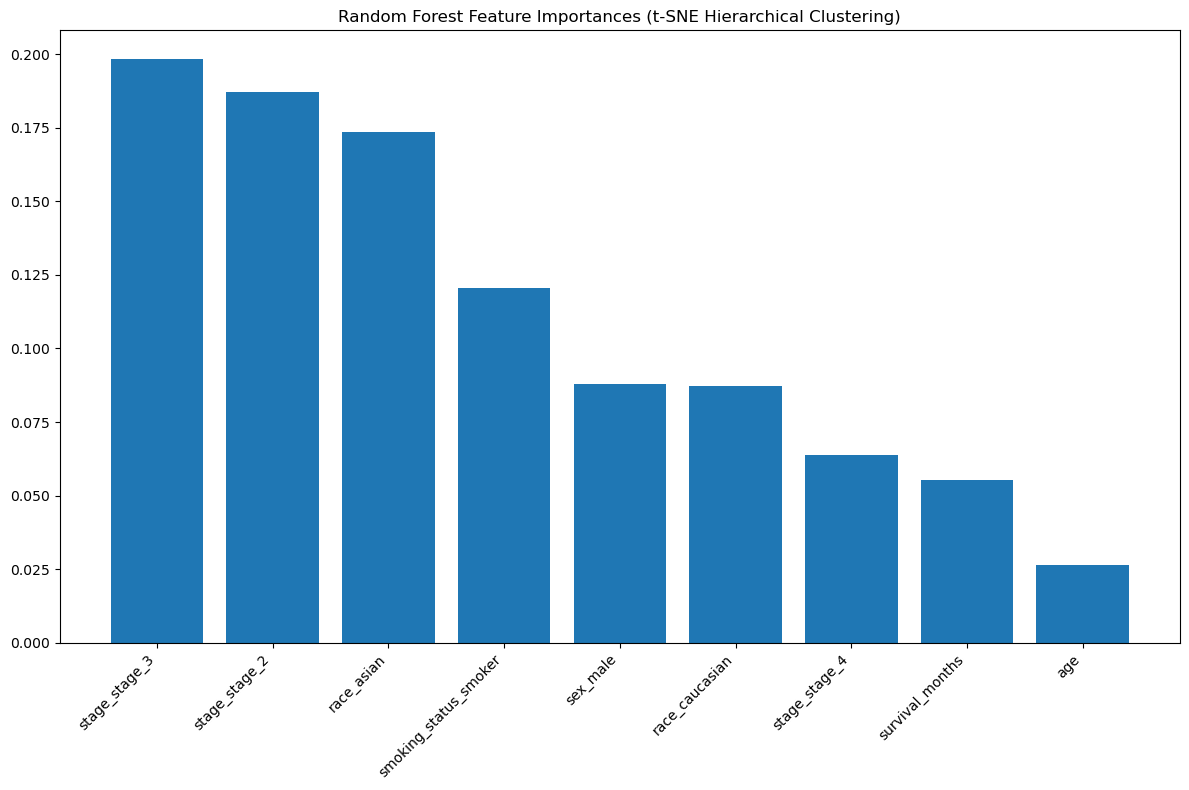

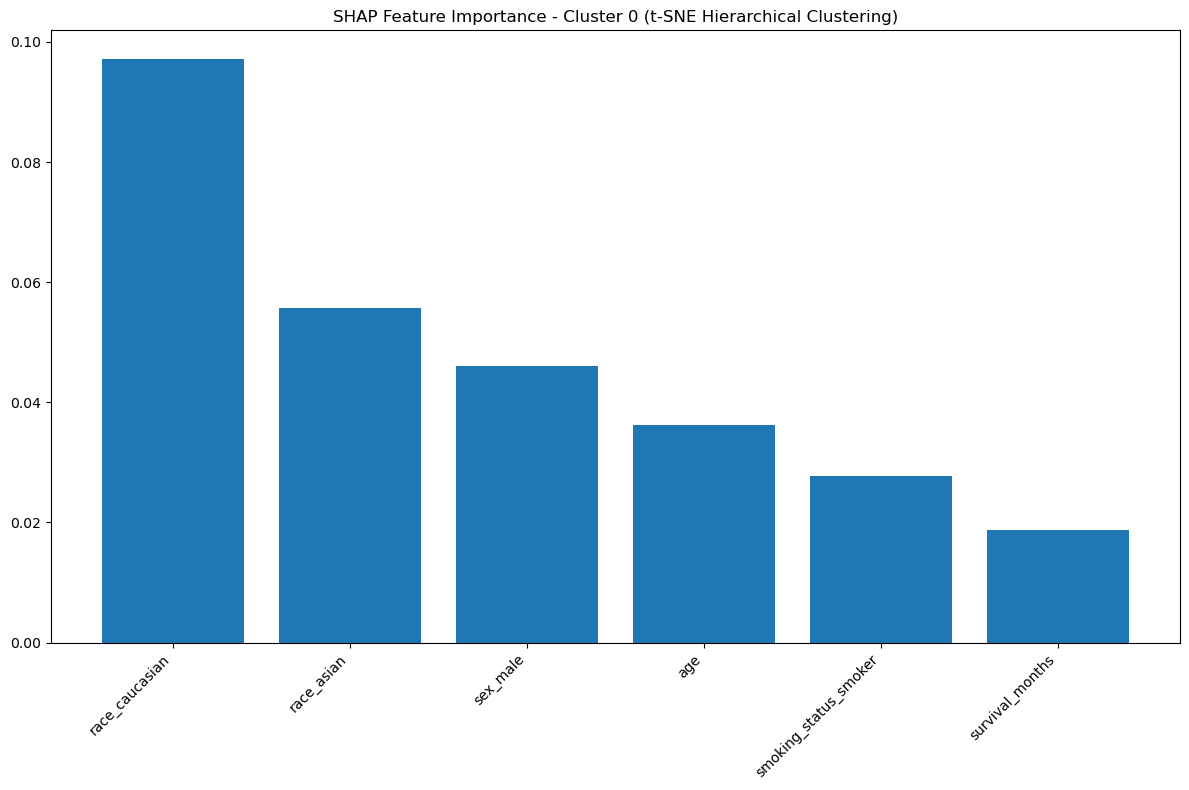

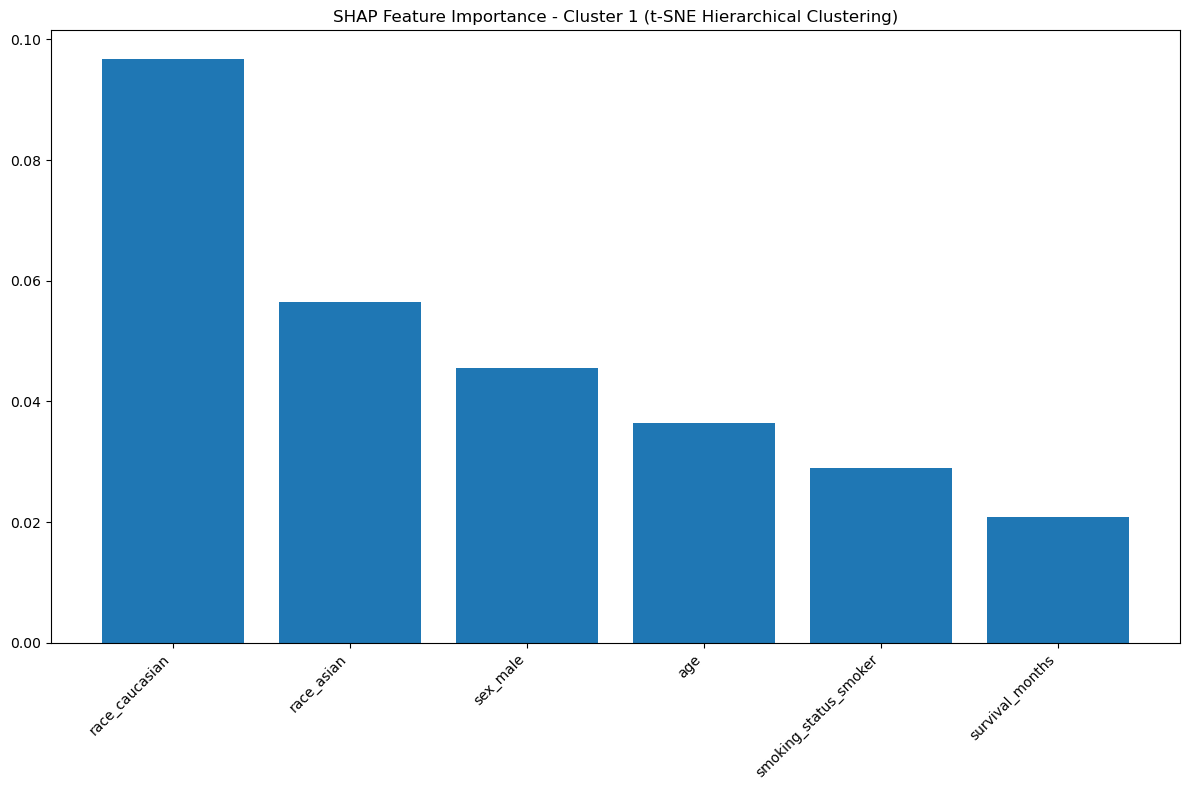

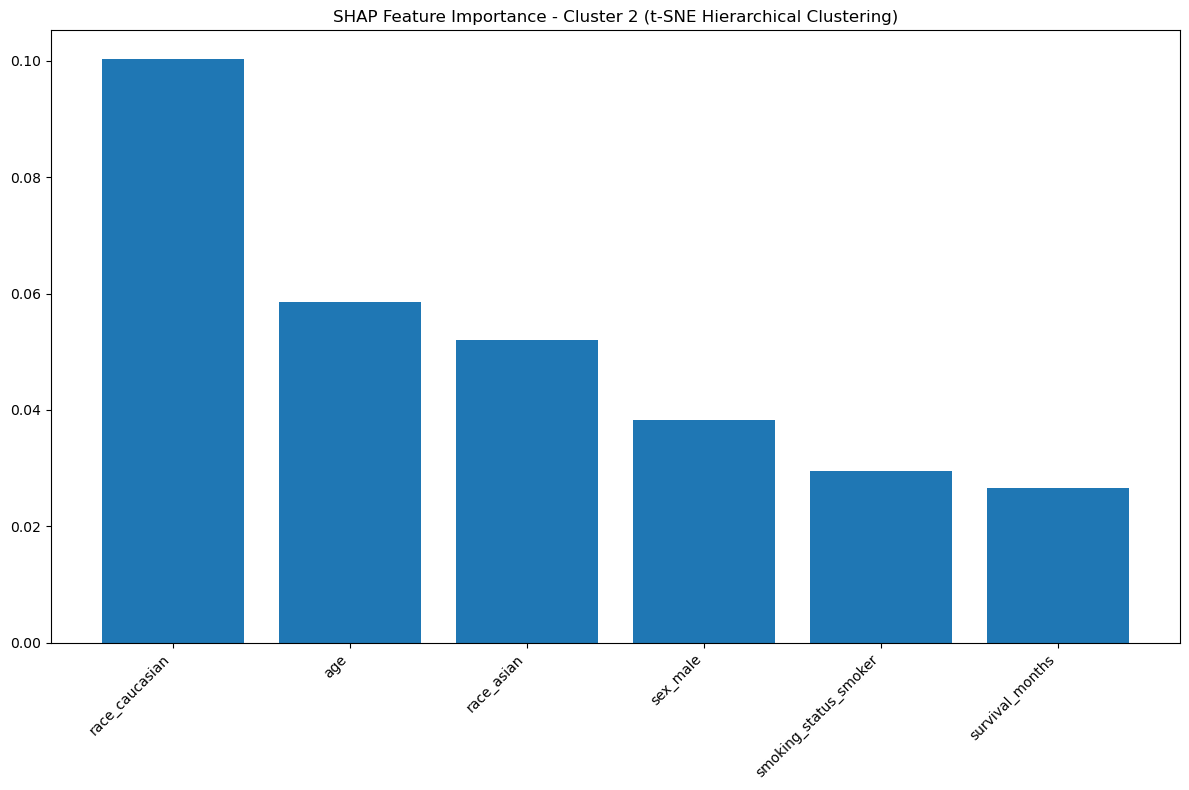

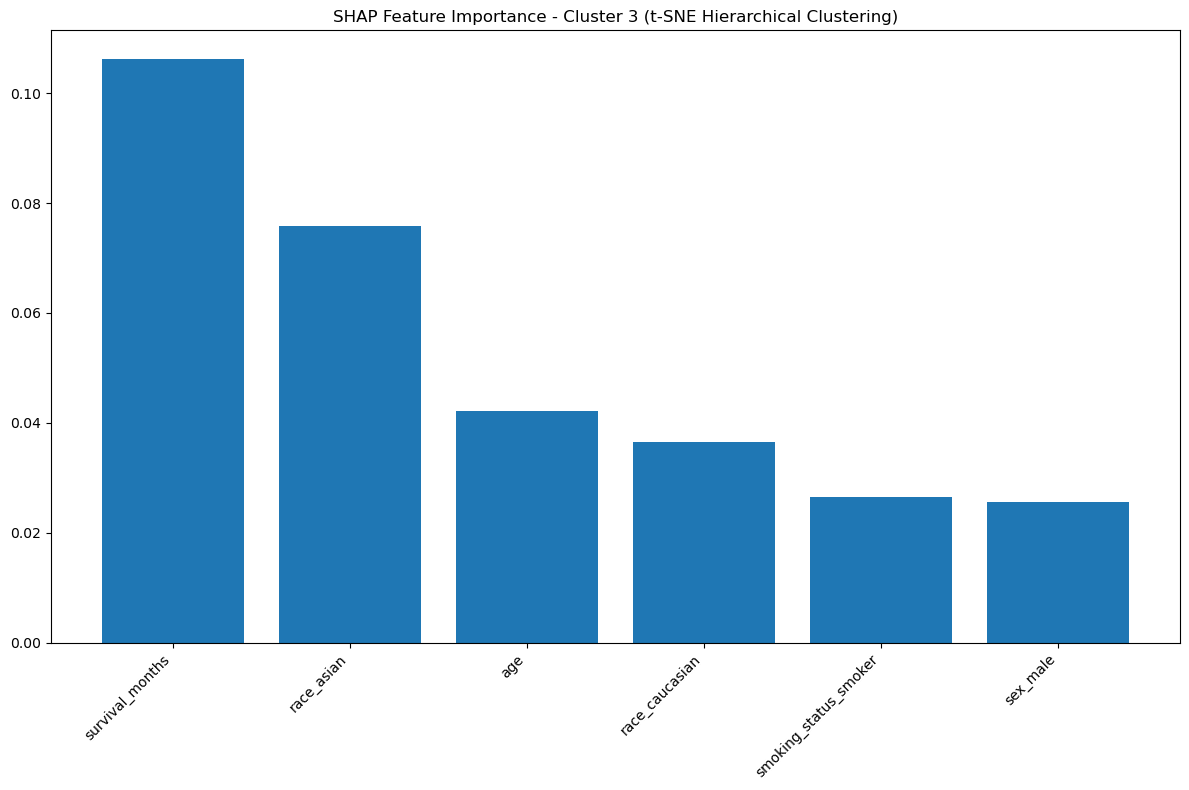

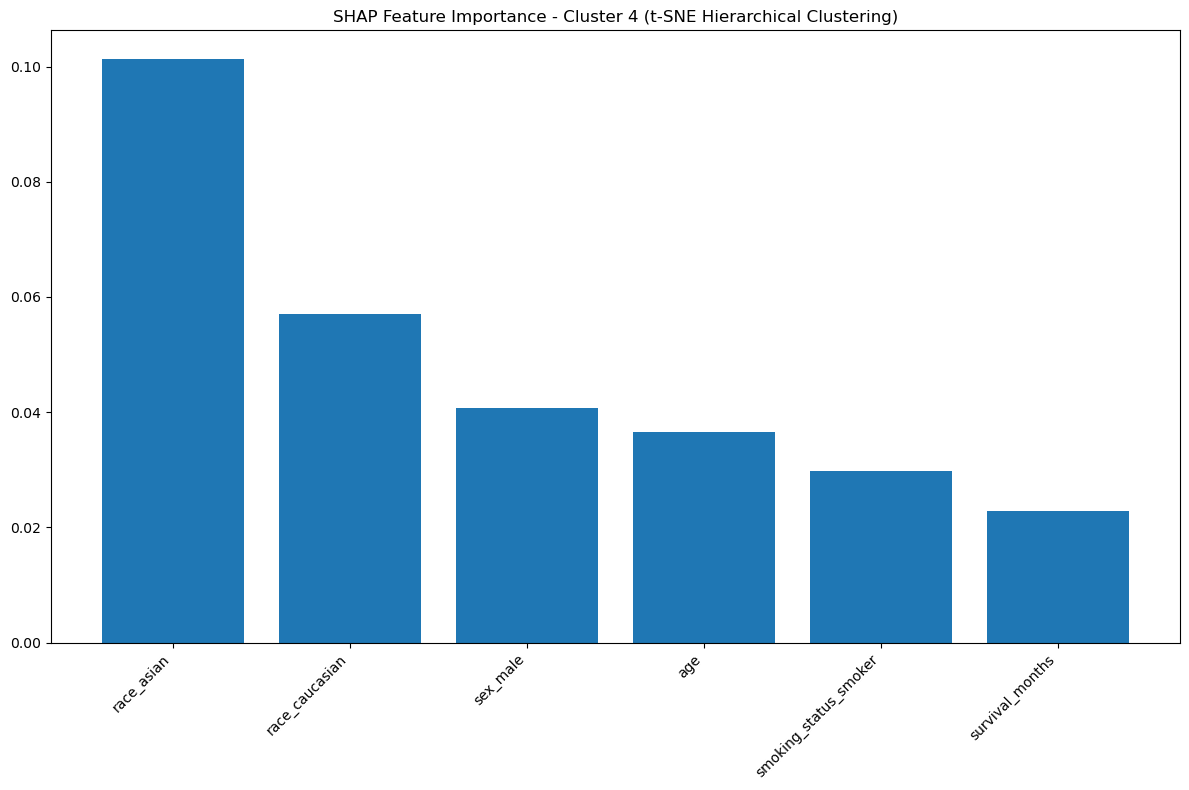

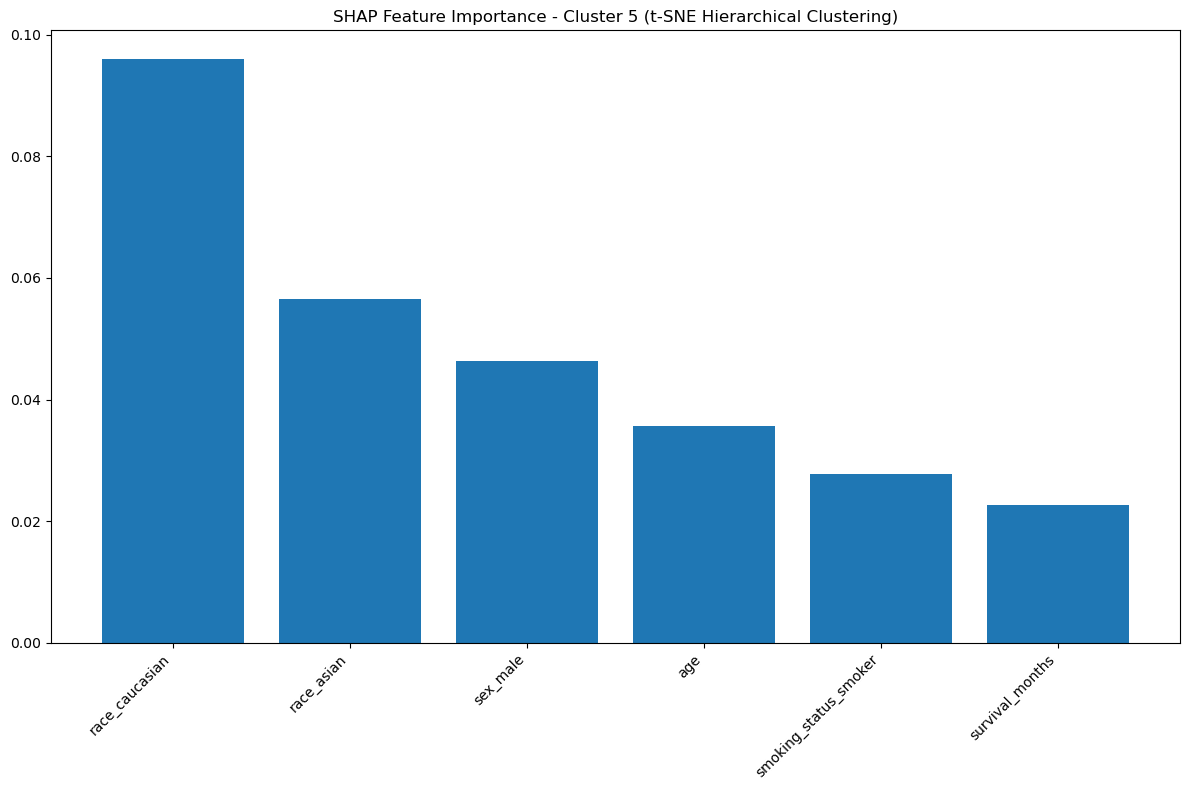

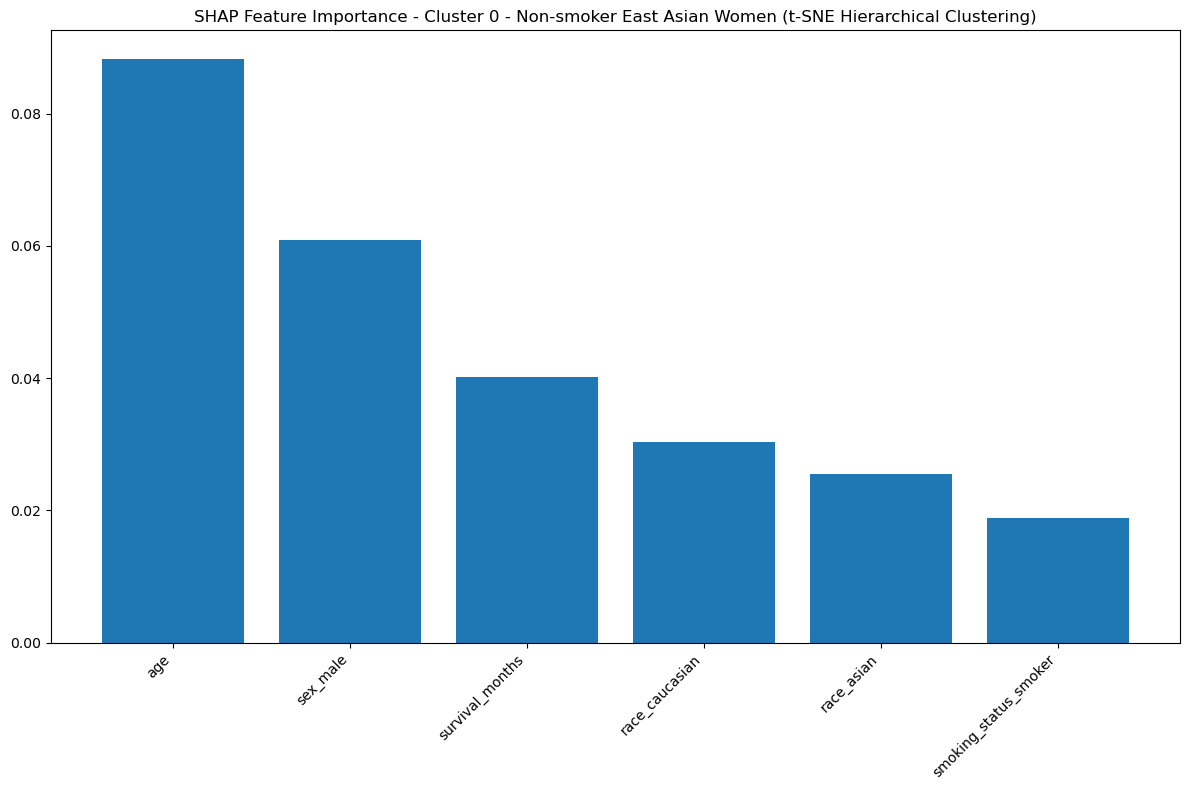

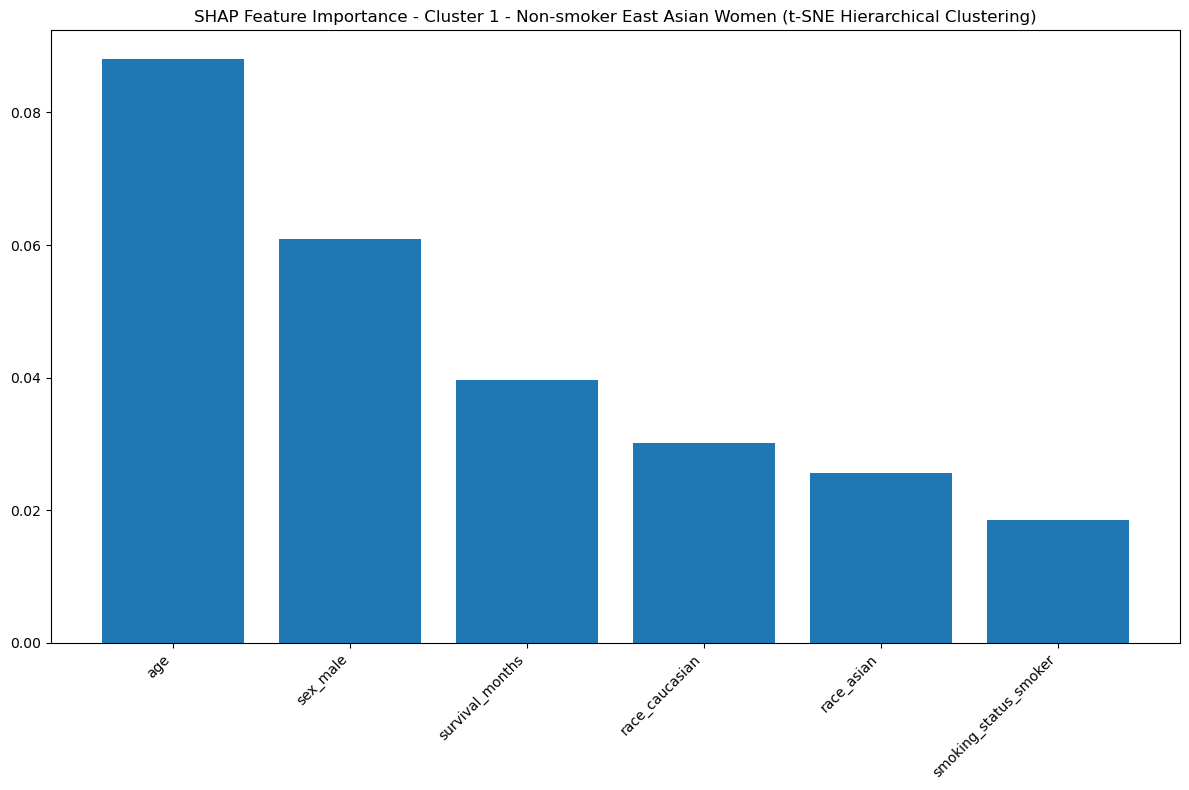

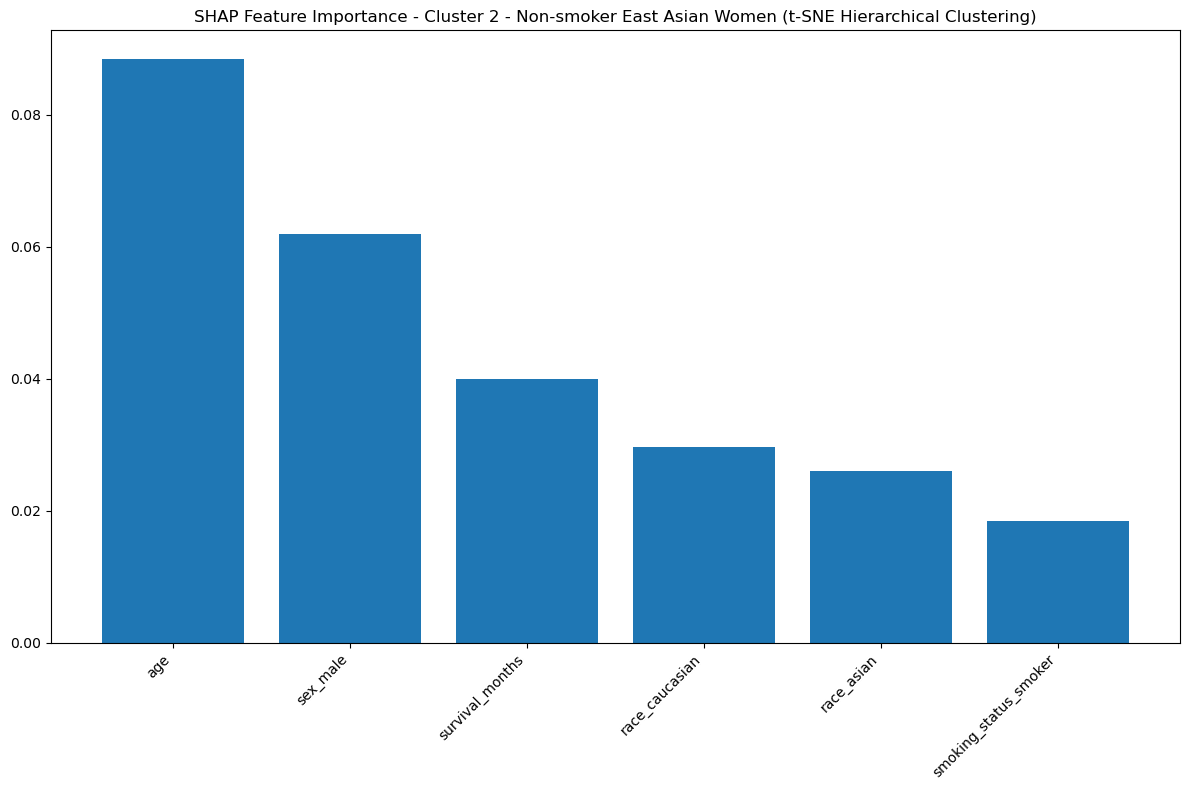

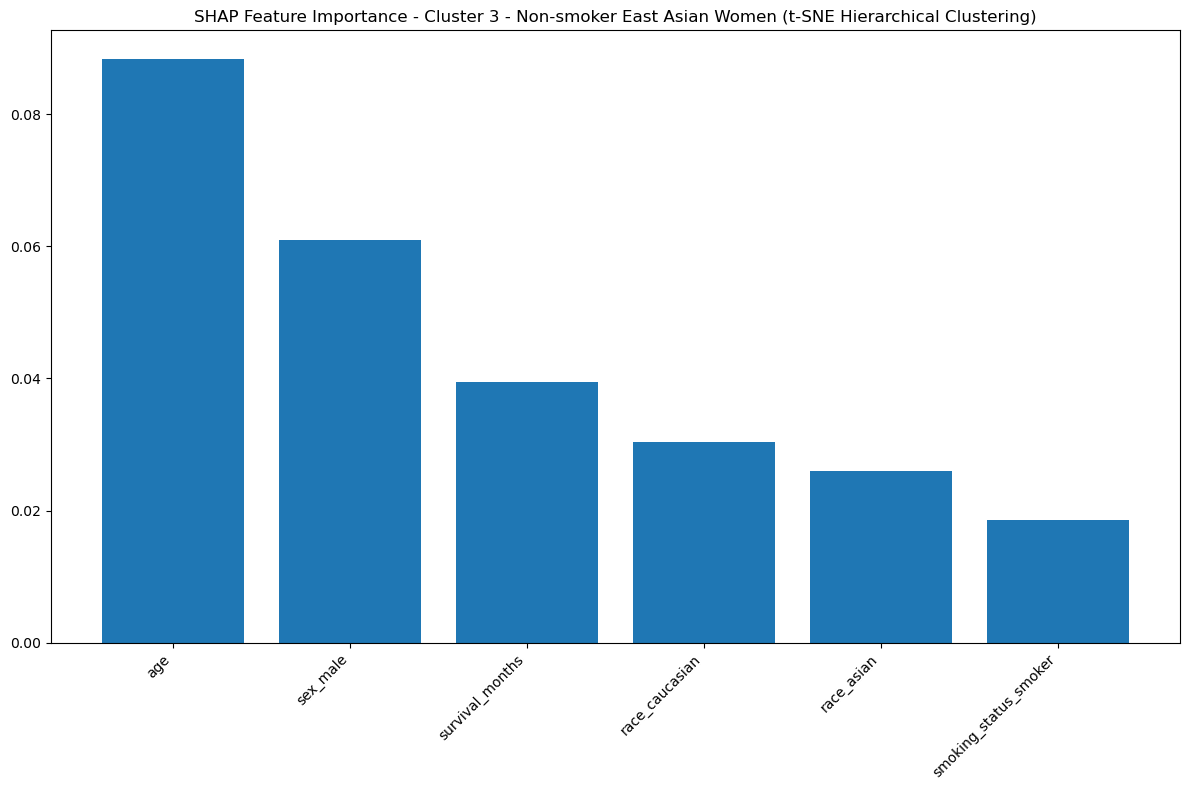

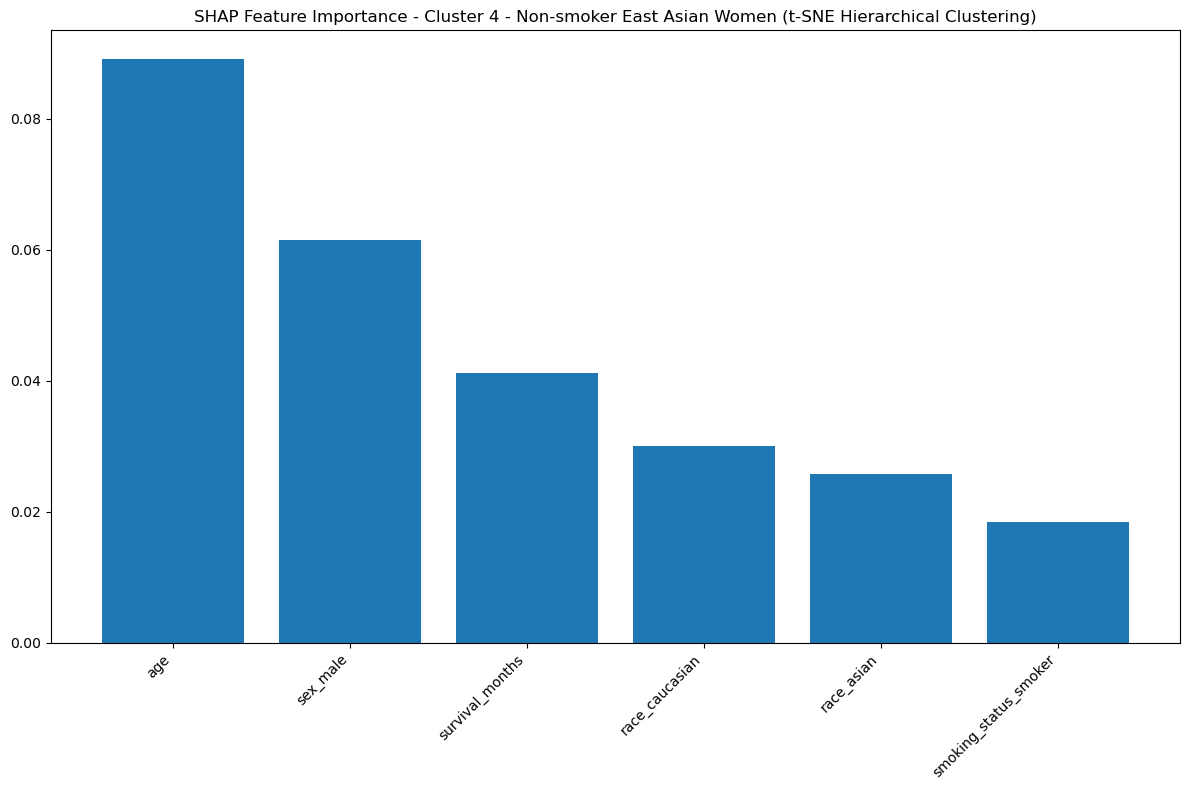

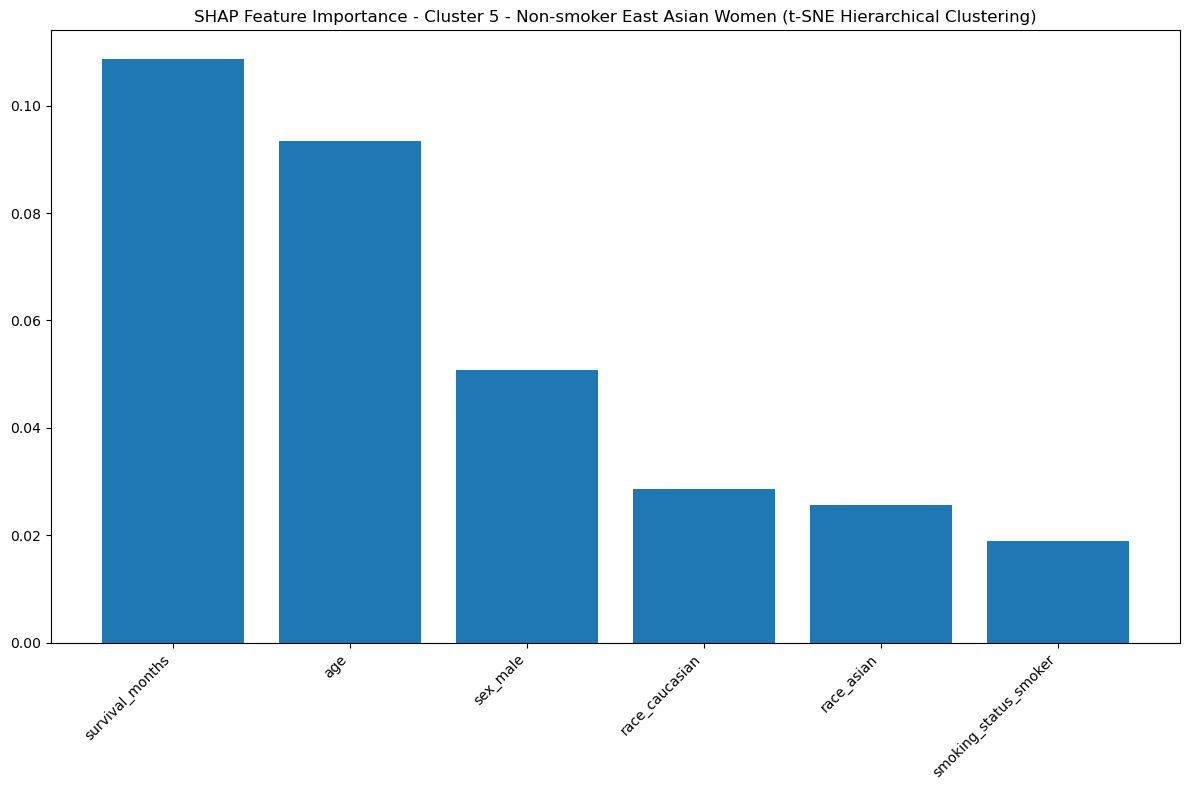

In [130]:
# 1. Perform SHAP analysis for each clustering method
tsne_explainer, tsne_shap = perform_shap_analysis(
    X=X_processed,
    clusters=tsne_clusters,
    feature_names=feature_names,
    clinical_data=data,
    model_name="t-SNE Hierarchical Clustering"
)


Performing SHAP Analysis for Gaussian Mixture Model...


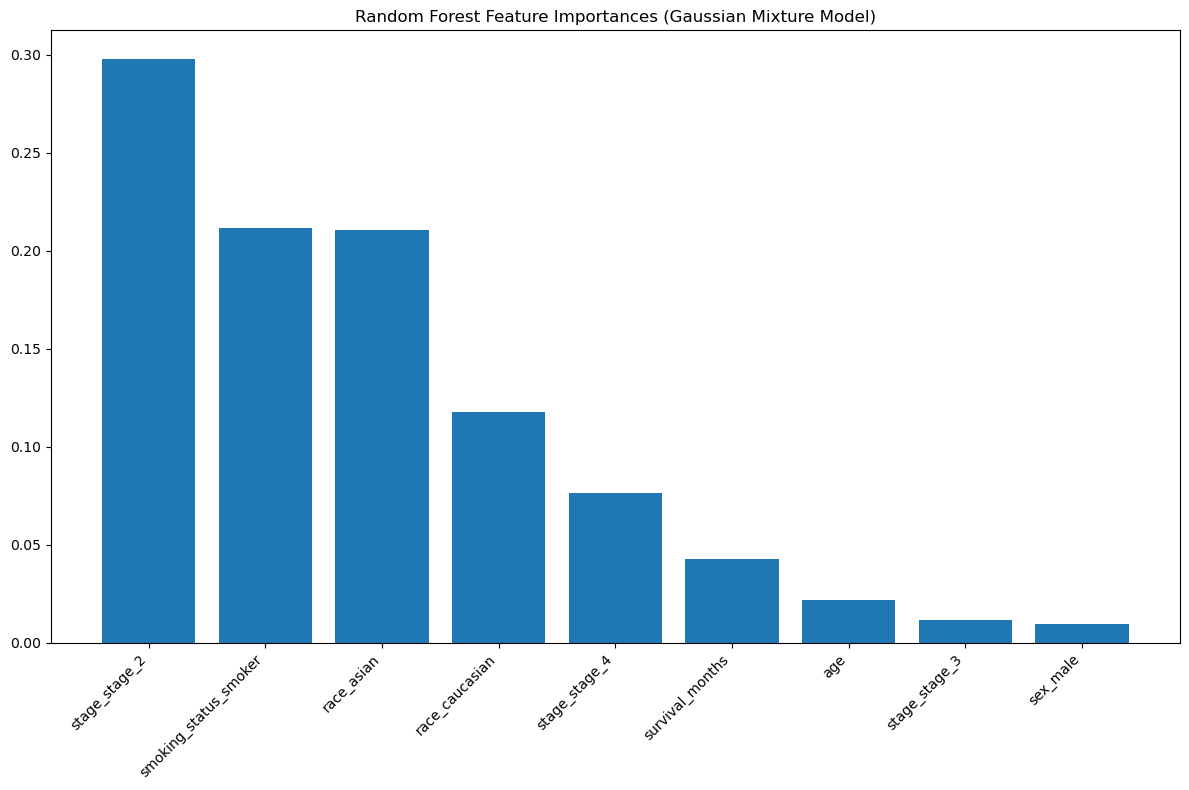

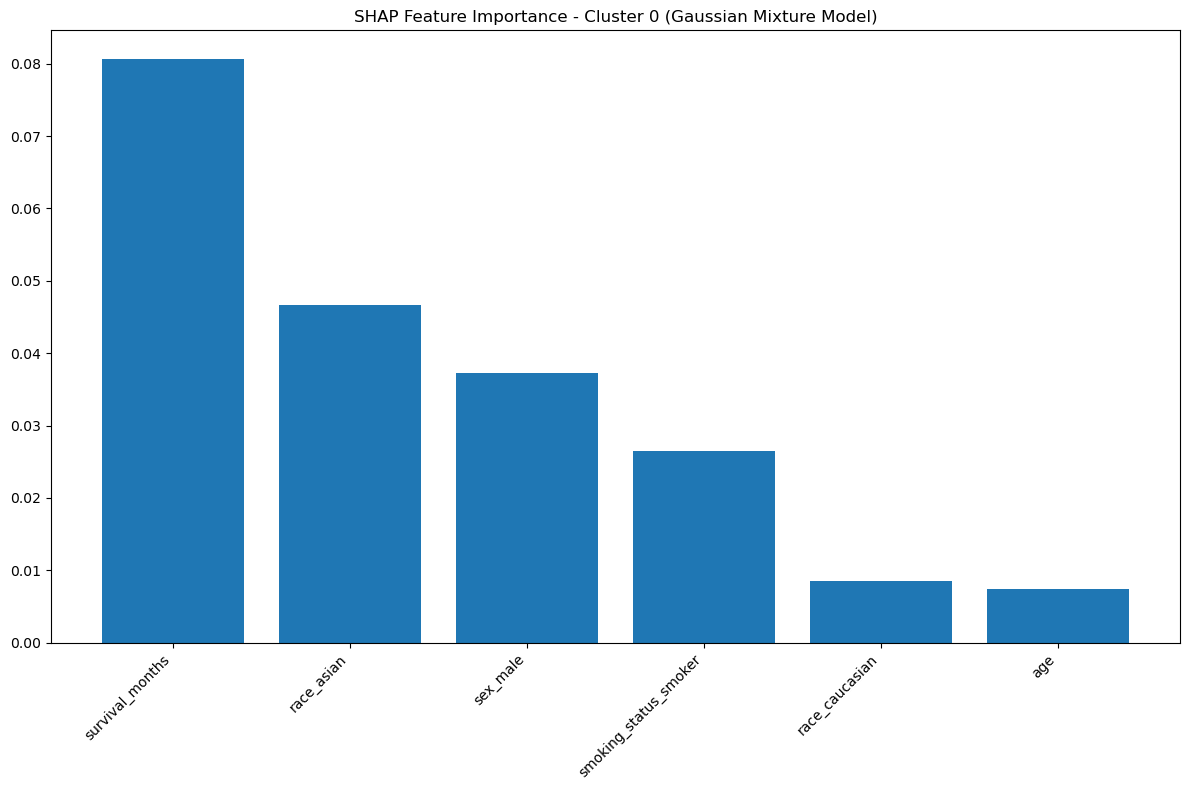

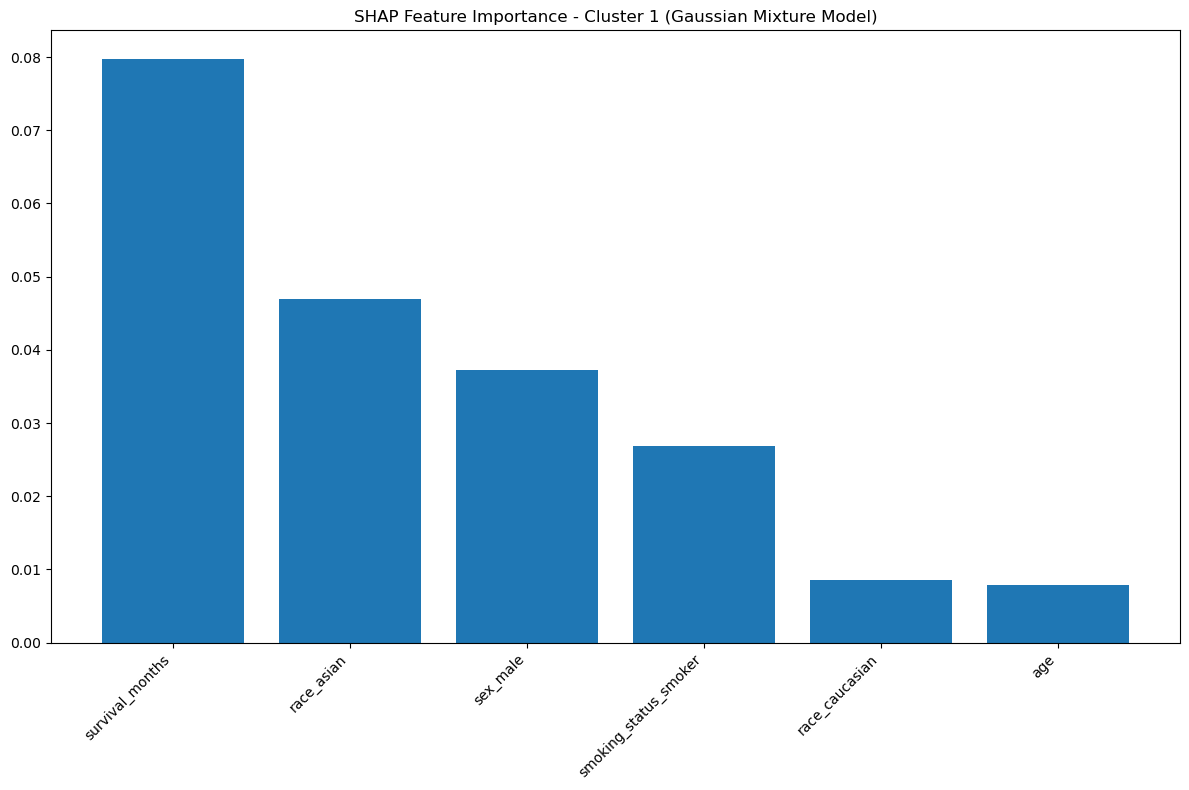

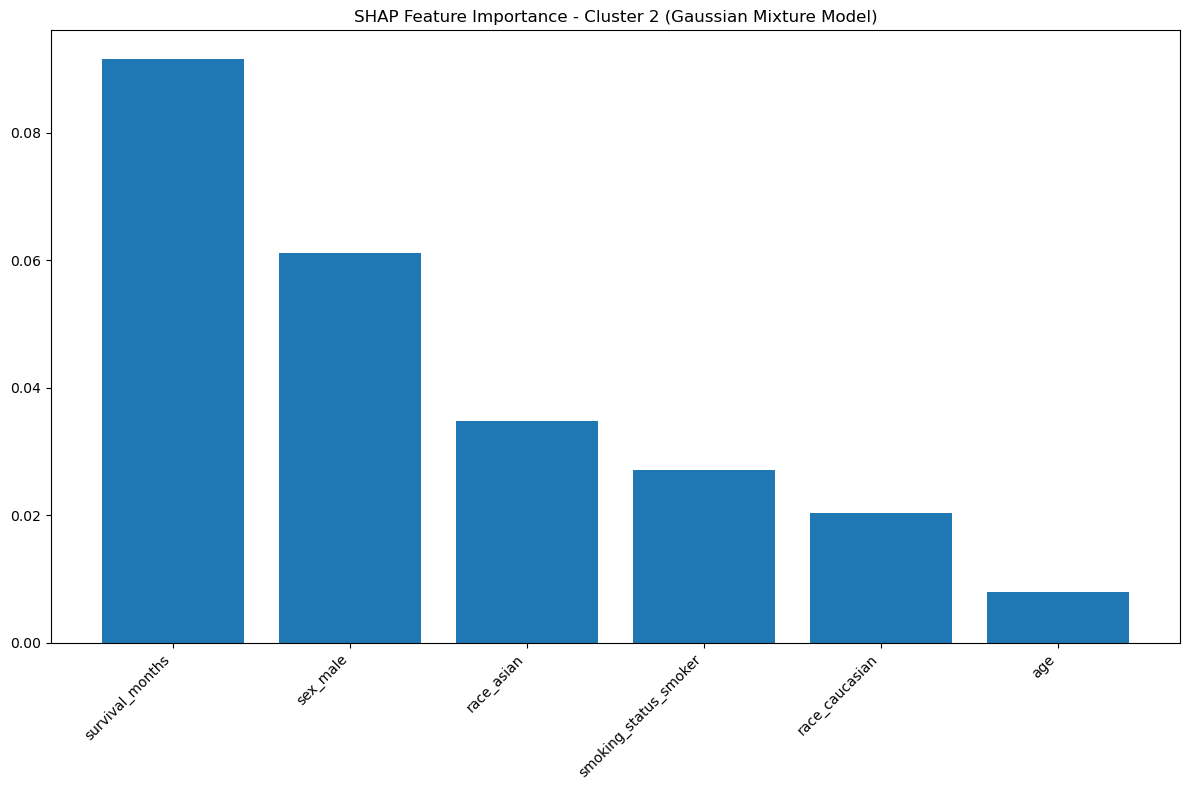

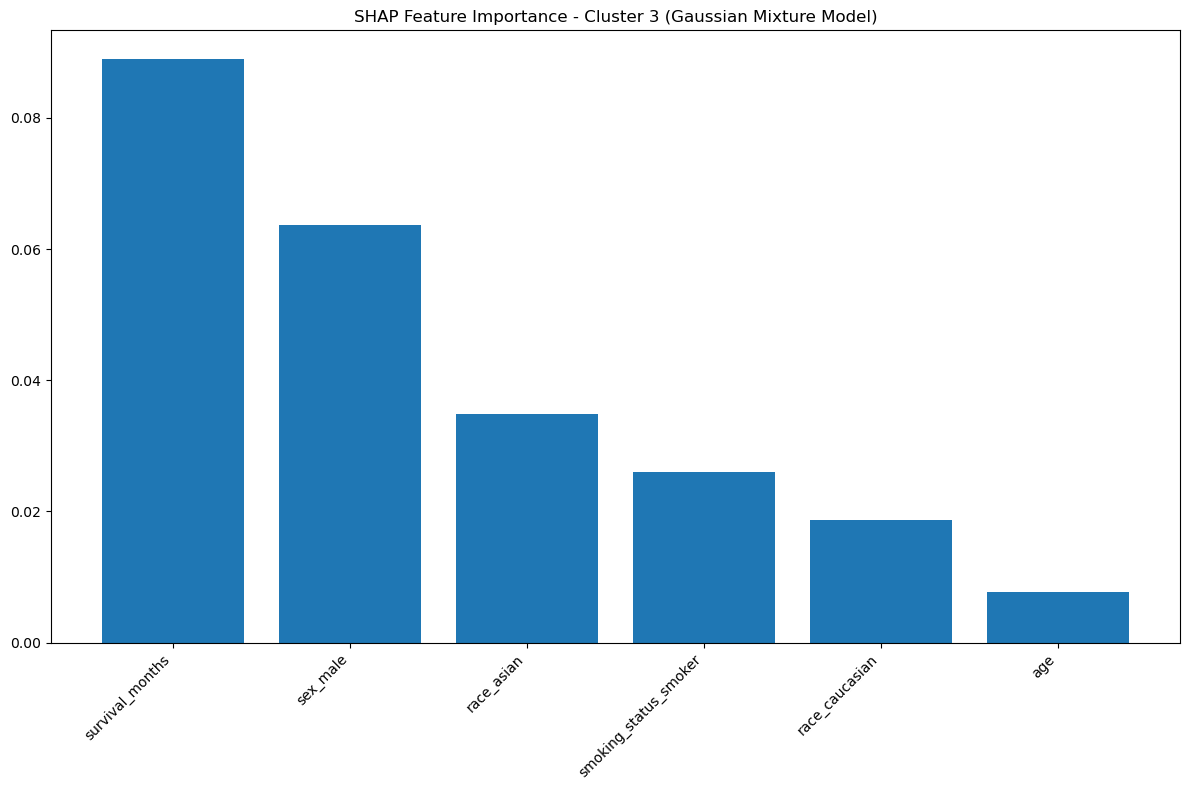

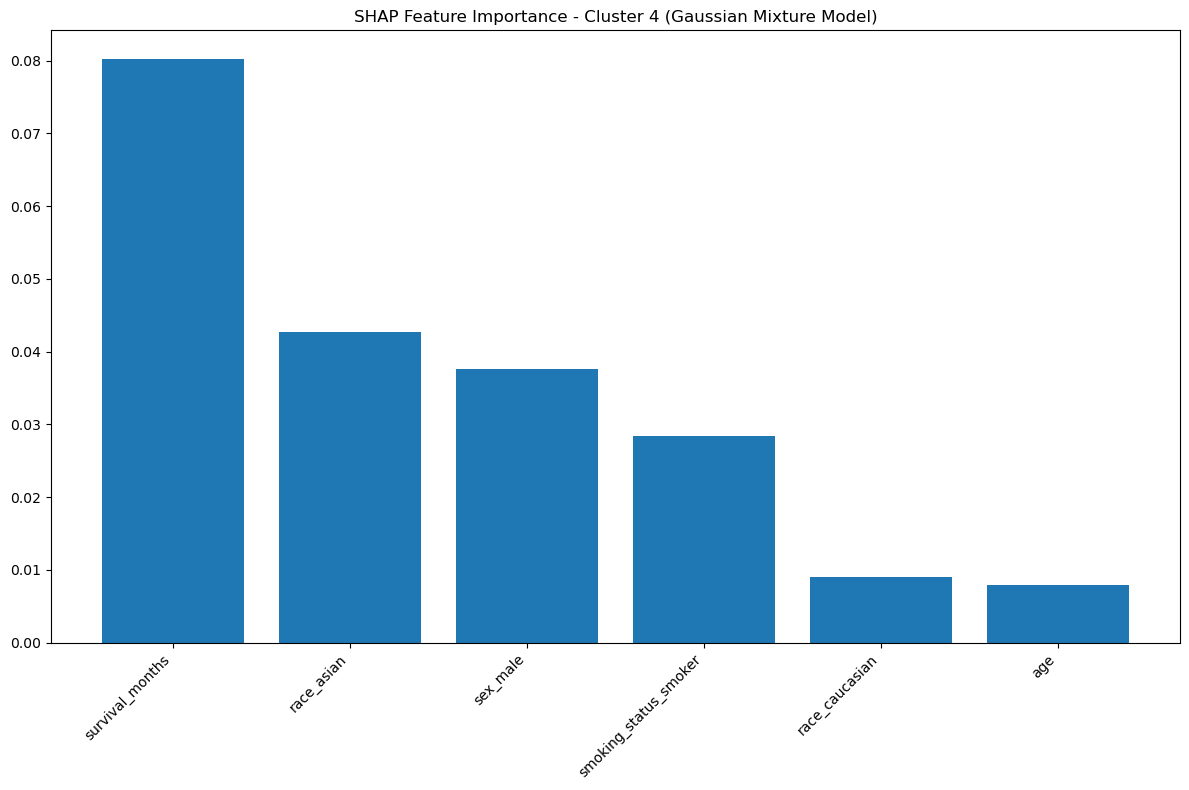

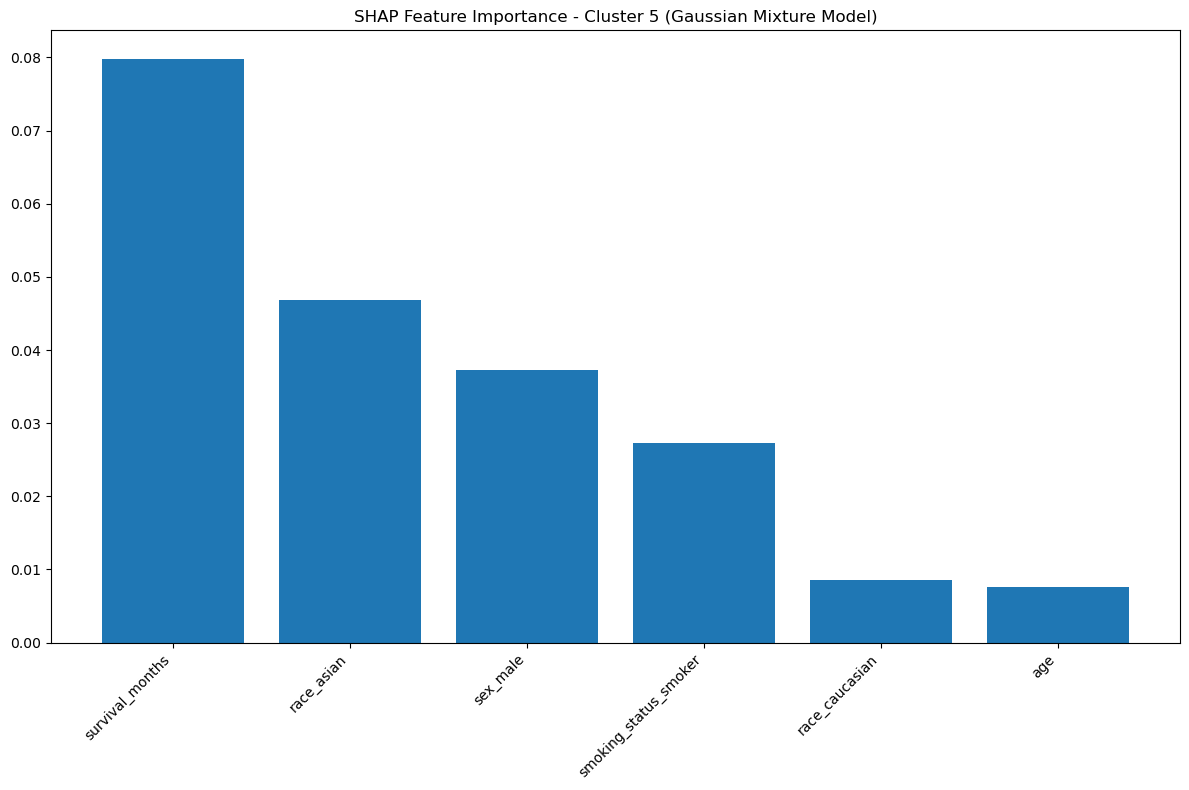

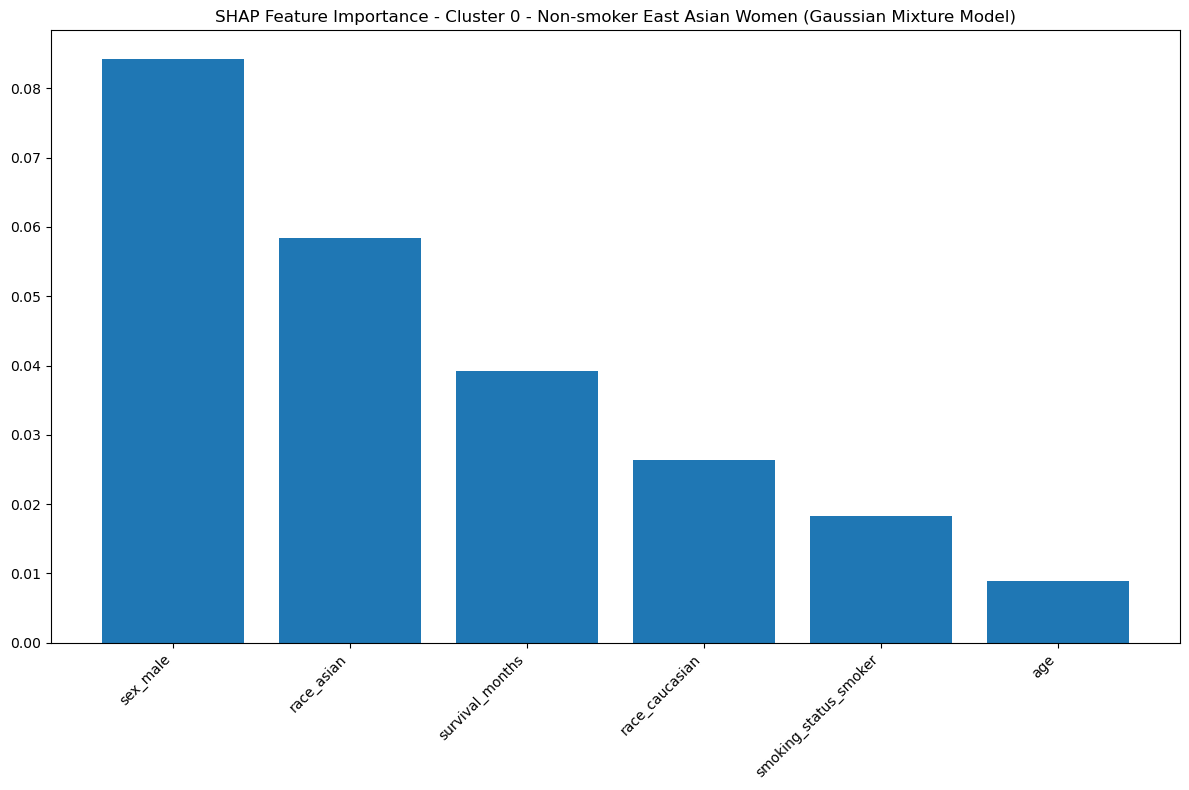

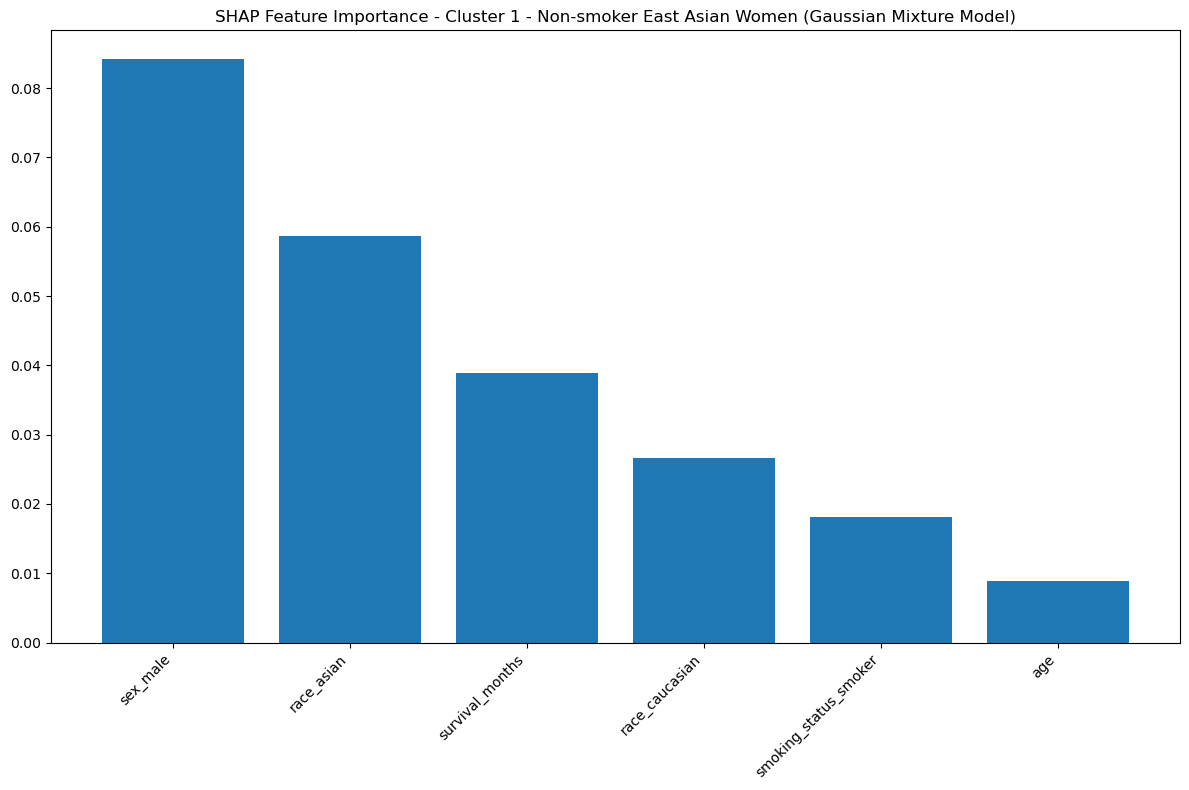

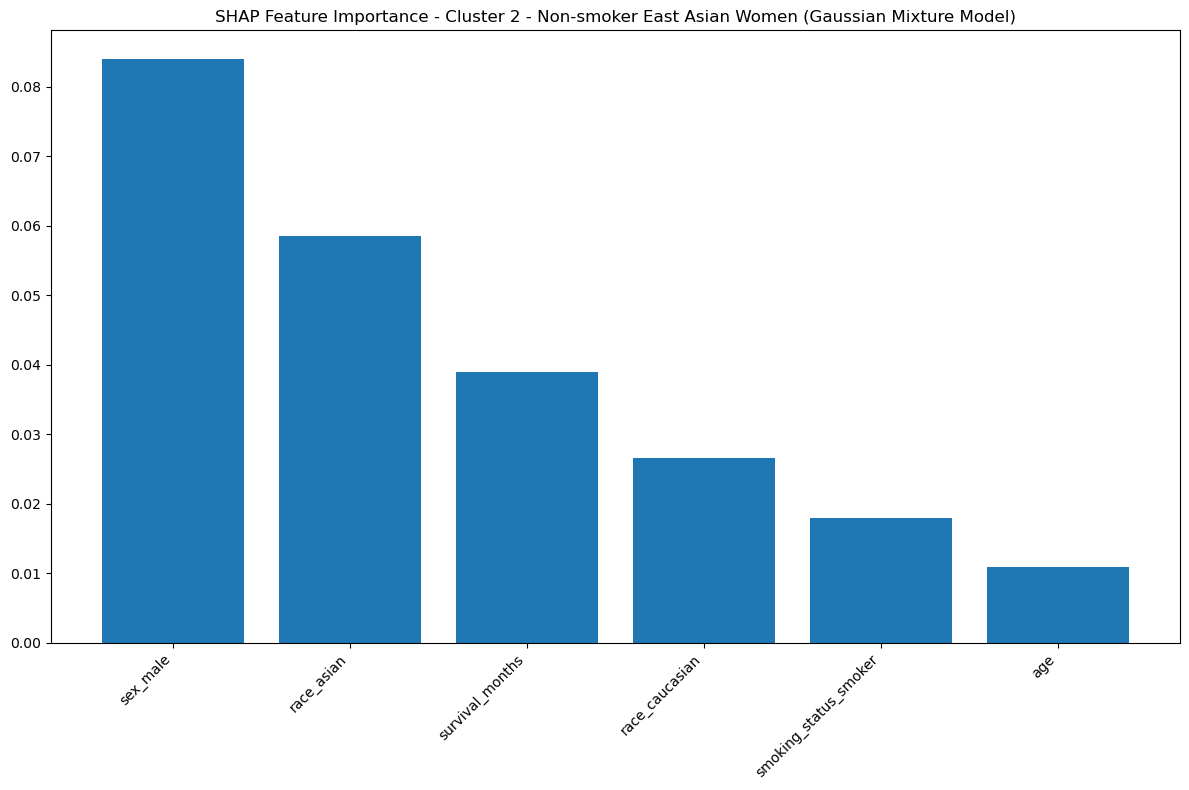

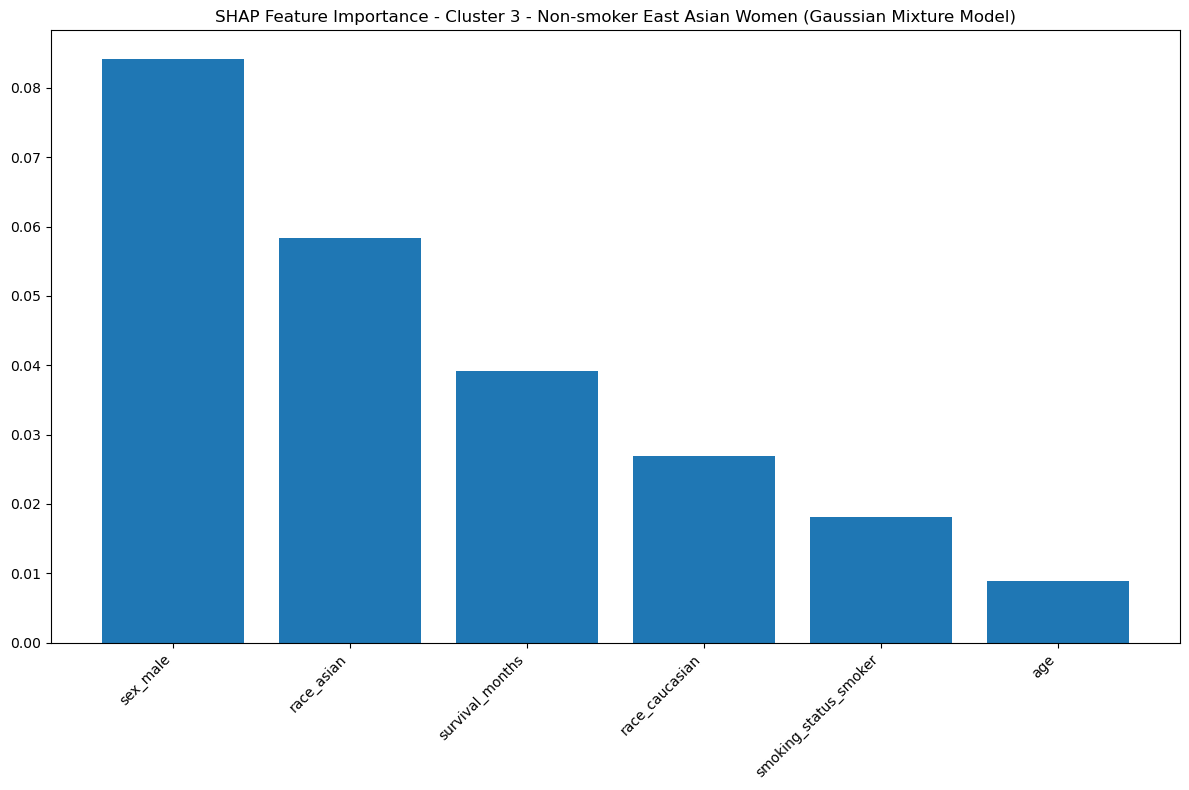

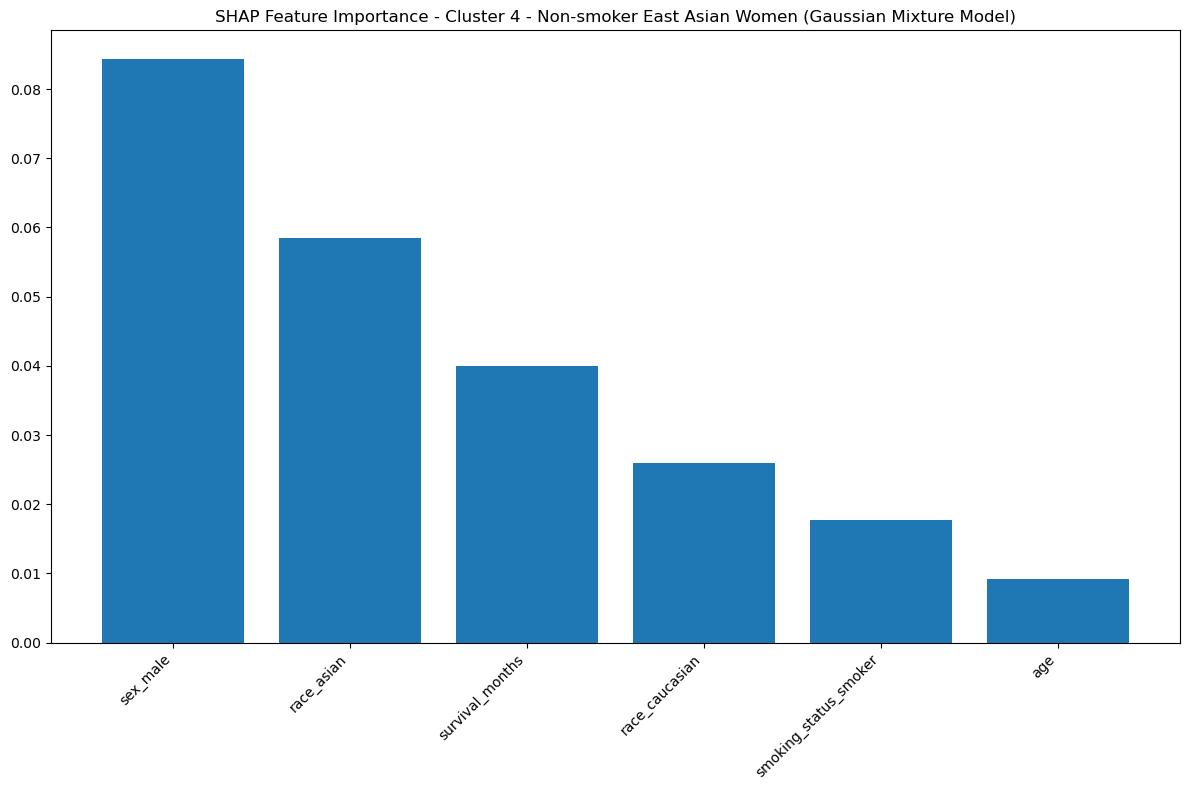

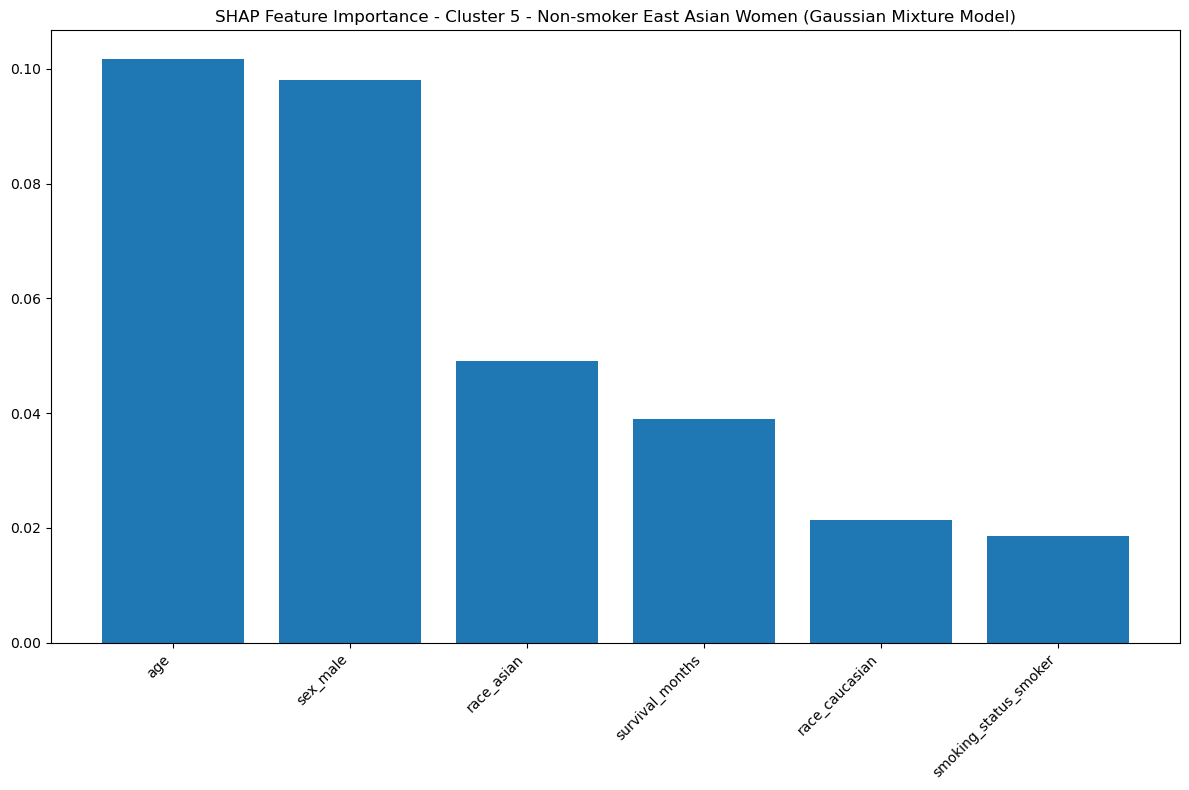

In [131]:
gmm_explainer, gmm_shap = perform_shap_analysis(
    X=X_processed,
    clusters=gmm_clusters,
    feature_names=feature_names,
    clinical_data=data,
    model_name="Gaussian Mixture Model"
)

In [106]:
# dbscan_explainer, dbscan_shap = perform_shap_analysis(
#     X=X_processed,
#     clusters=dbscan_clusters,
#     feature_names=feature_names,
#     clinical_data=data,
#     model_name="DBSCAN"
# )


Analyzing cluster transitions...
X shape: (876, 9)
Number of feature names: 9

Analyzing TSNE_vs_GMM...
Number of disagreements: 660

Random Forest Feature Importances:


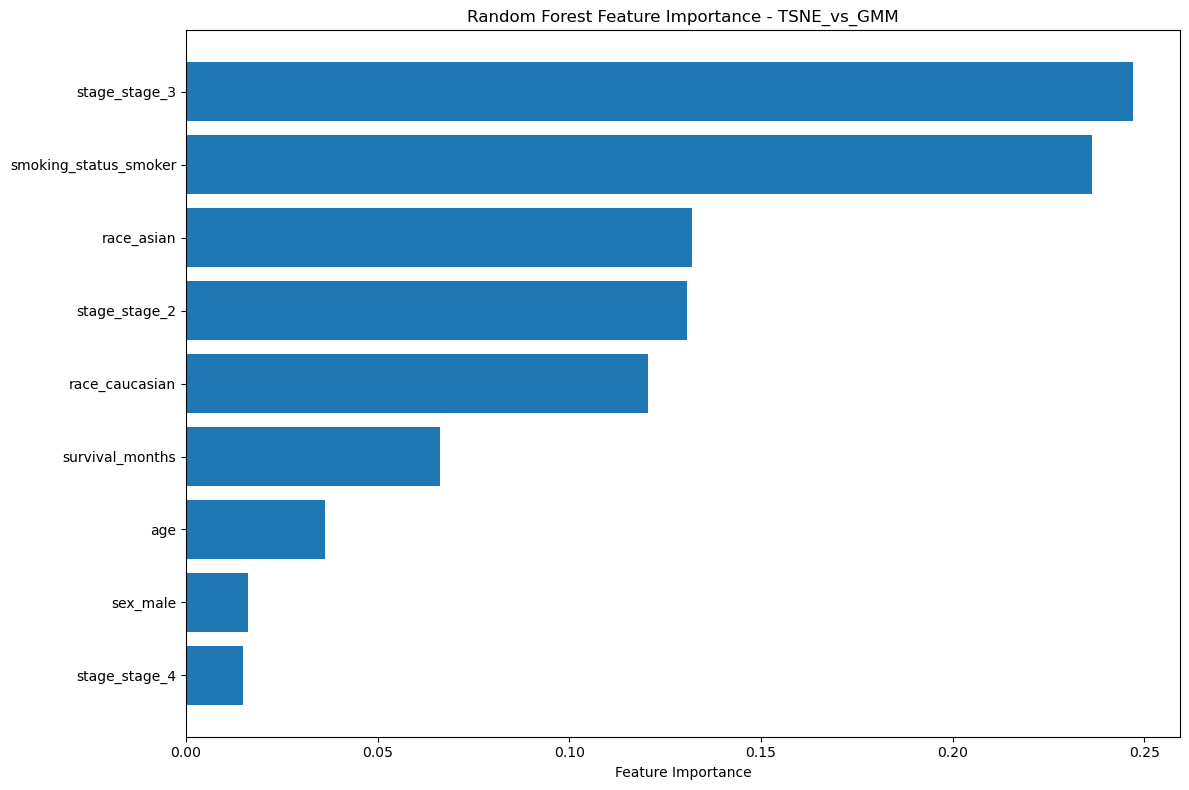

                 Feature  Importance
7          stage_stage_3    0.246983
5  smoking_status_smoker    0.236479
3             race_asian    0.131956
6          stage_stage_2    0.130755
4         race_caucasian    0.120589
SHAP values shape: (876, 9, 2)
Processed SHAP values shape: (9,)


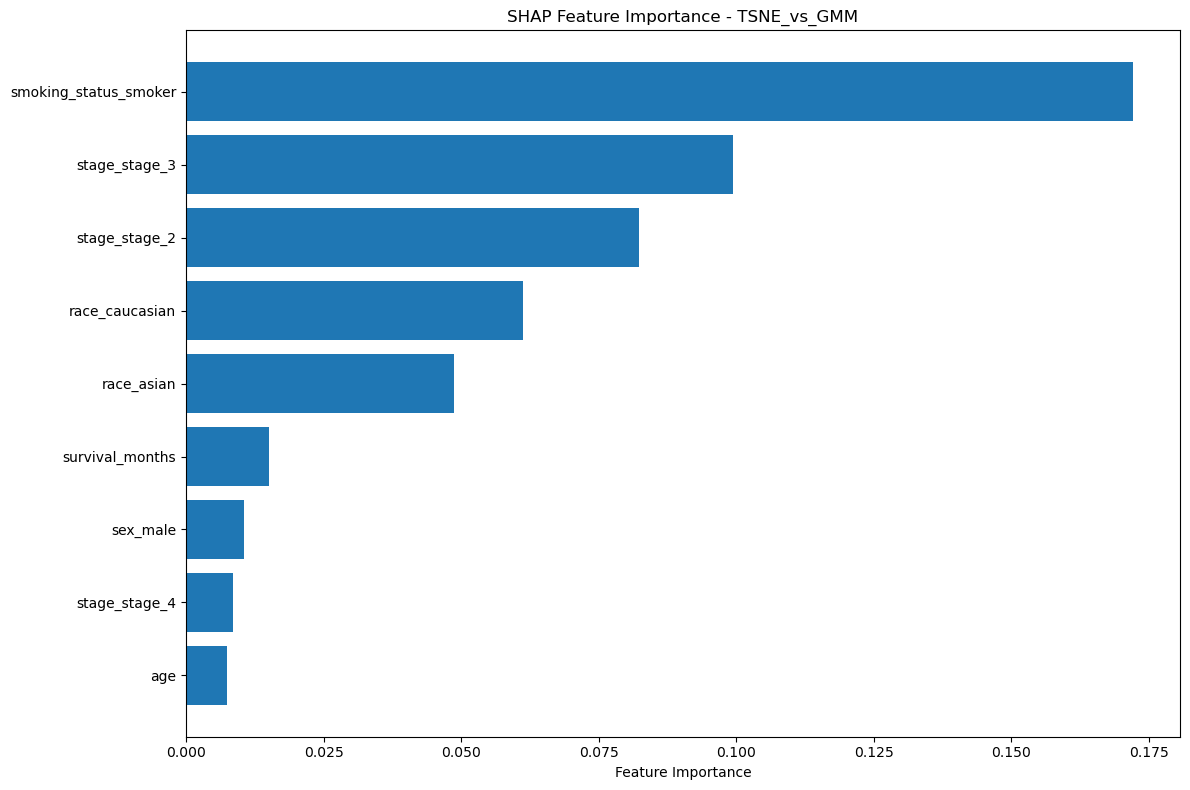


Top 5 features driving differences (SHAP):
                 Feature  Importance
5  smoking_status_smoker    0.172108
7          stage_stage_3    0.099353
6          stage_stage_2    0.082273
4         race_caucasian    0.061341
3             race_asian    0.048689

Analyzing TSNE_vs_DBSCAN...
Number of disagreements: 818

Random Forest Feature Importances:


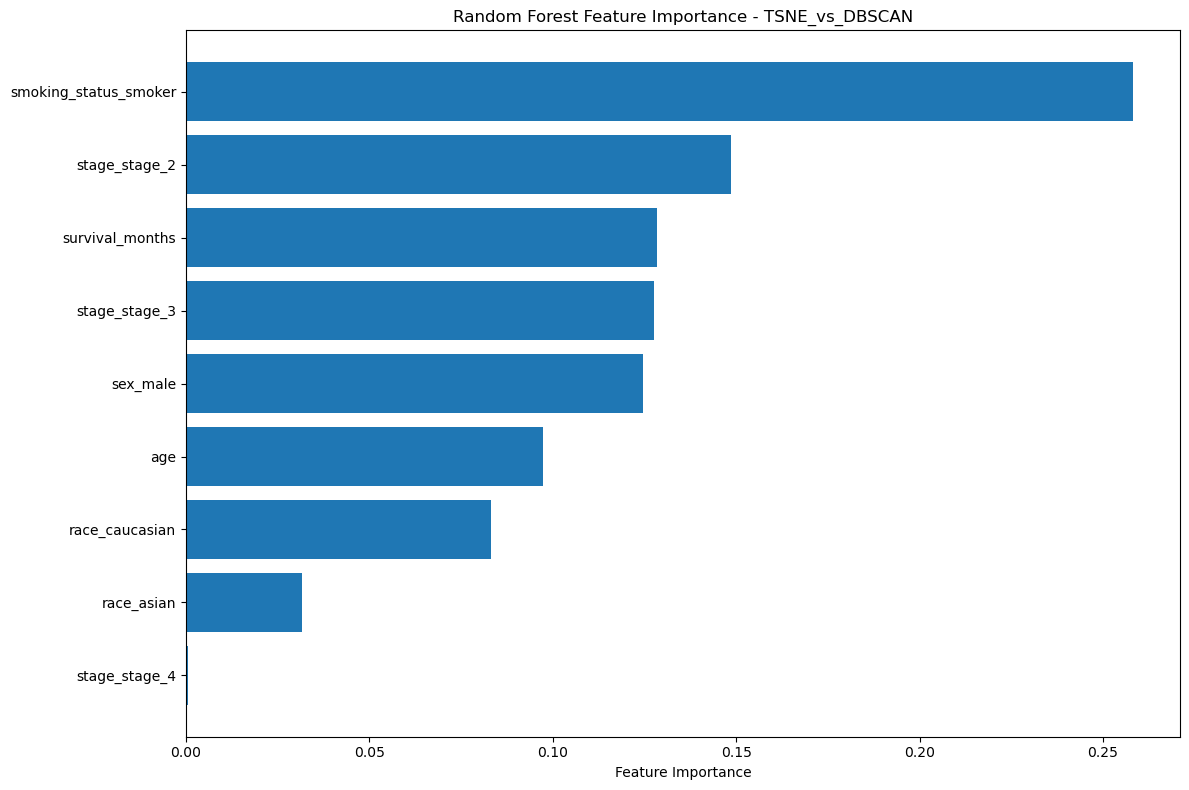

                 Feature  Importance
5  smoking_status_smoker    0.258084
6          stage_stage_2    0.148647
1        survival_months    0.128416
7          stage_stage_3    0.127652
2               sex_male    0.124660
SHAP values shape: (876, 9, 2)
Processed SHAP values shape: (9,)


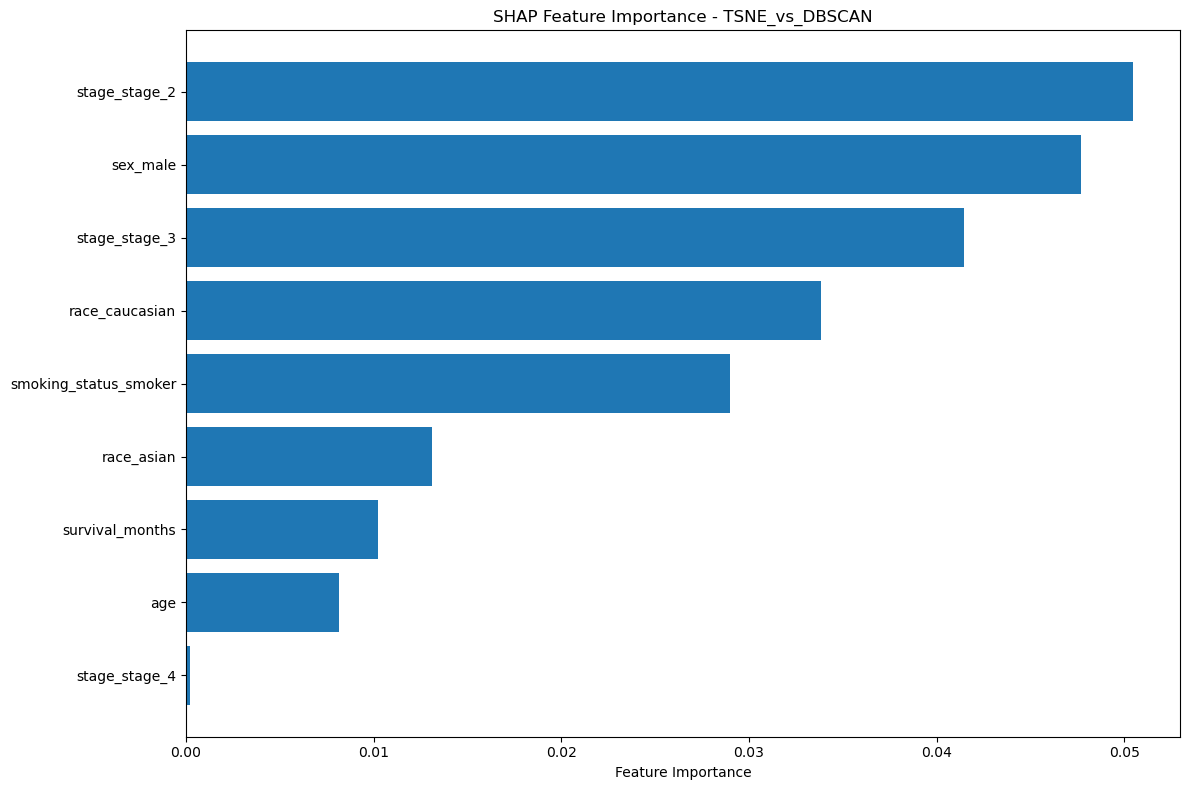


Top 5 features driving differences (SHAP):
                 Feature  Importance
6          stage_stage_2    0.050442
2               sex_male    0.047676
7          stage_stage_3    0.041458
4         race_caucasian    0.033845
5  smoking_status_smoker    0.028992

Analyzing GMM_vs_DBSCAN...
Number of disagreements: 838

Random Forest Feature Importances:


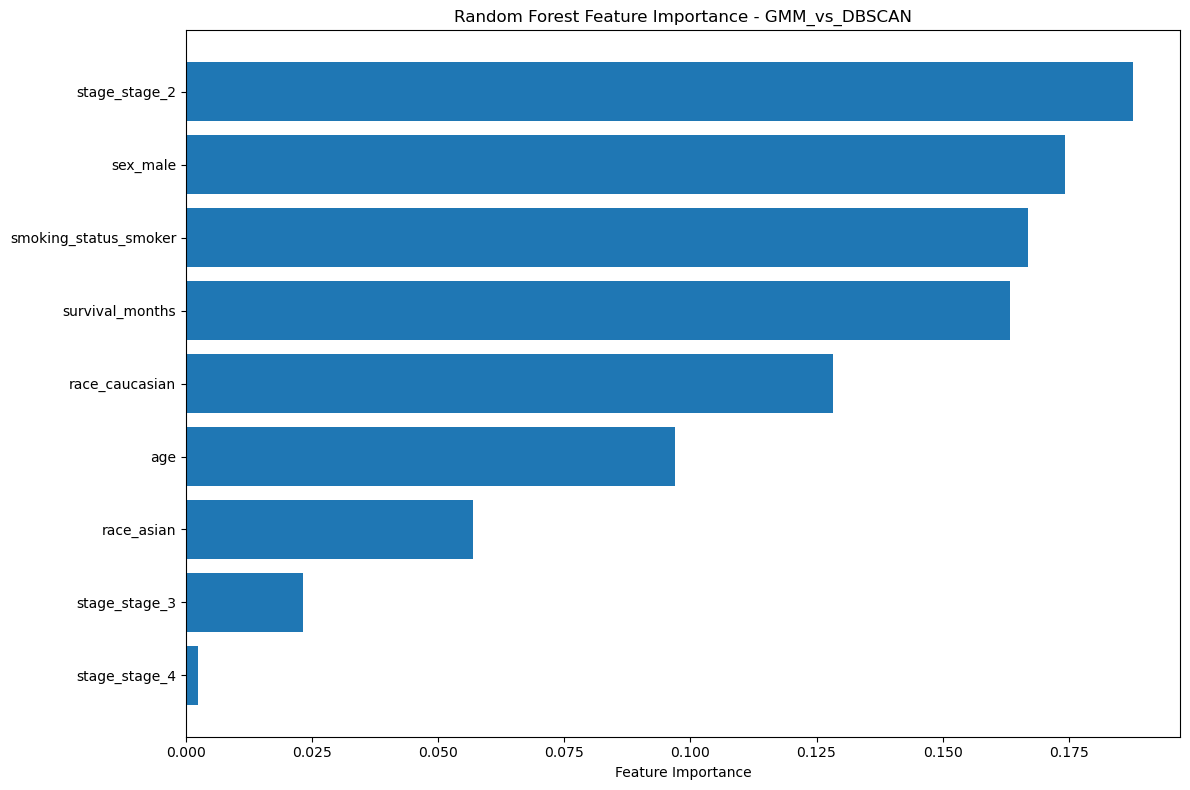

                 Feature  Importance
6          stage_stage_2    0.187683
2               sex_male    0.174288
5  smoking_status_smoker    0.166948
1        survival_months    0.163451
4         race_caucasian    0.128329
SHAP values shape: (876, 9, 2)
Processed SHAP values shape: (9,)


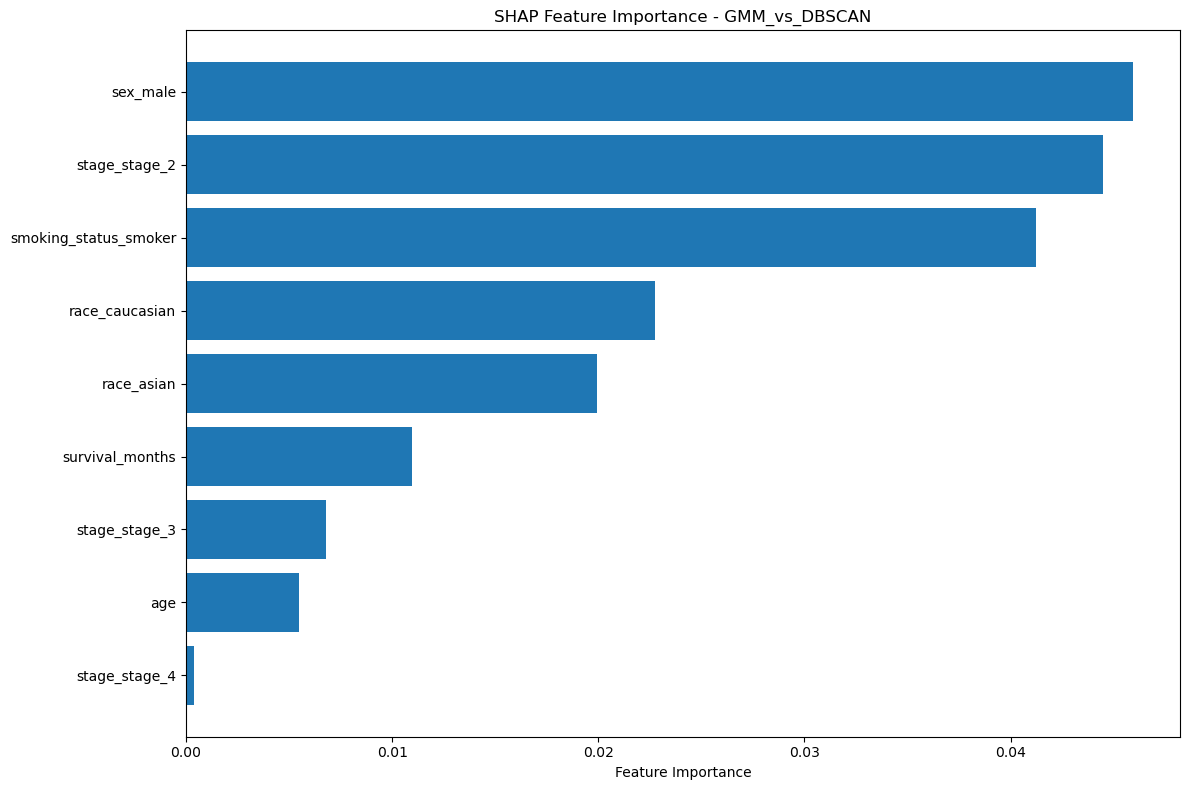


Top 5 features driving differences (SHAP):
                 Feature  Importance
2               sex_male    0.045921
6          stage_stage_2    0.044466
5  smoking_status_smoker    0.041240
4         race_caucasian    0.022739
3             race_asian    0.019943

Analyzing overall disagreement patterns...
Total samples with any disagreement: 876


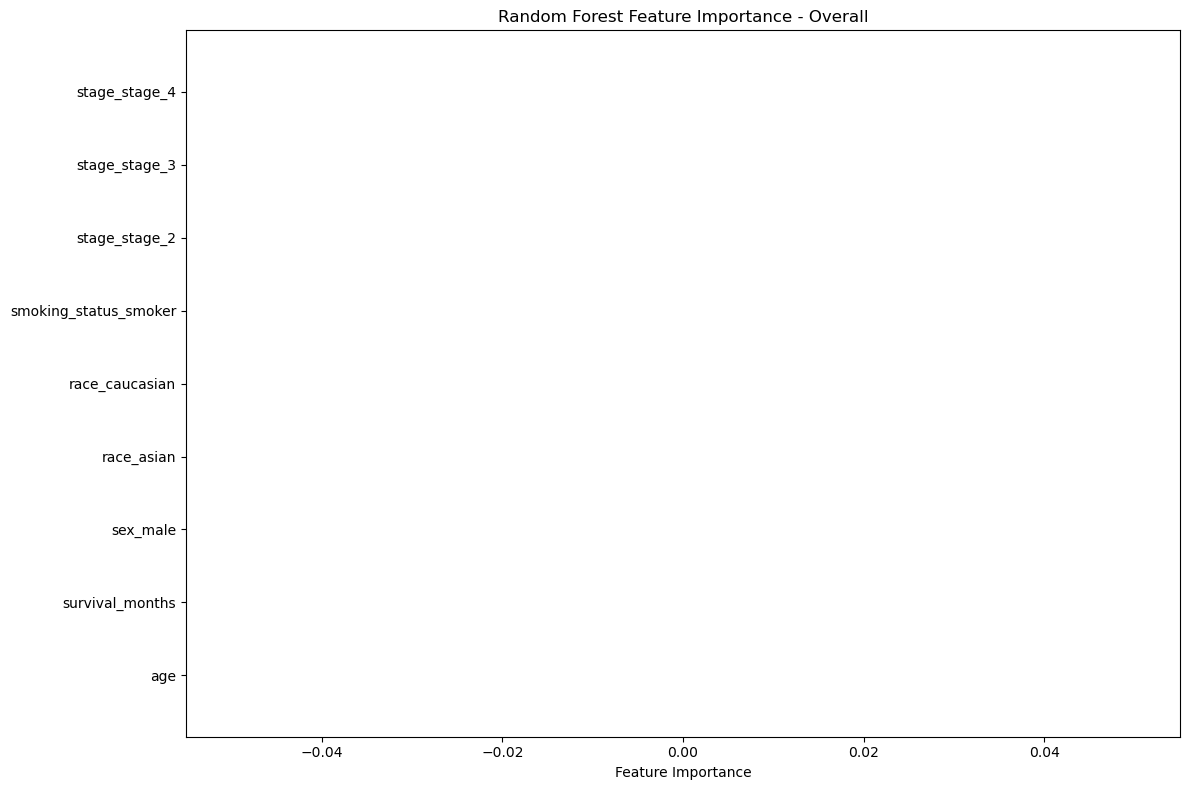

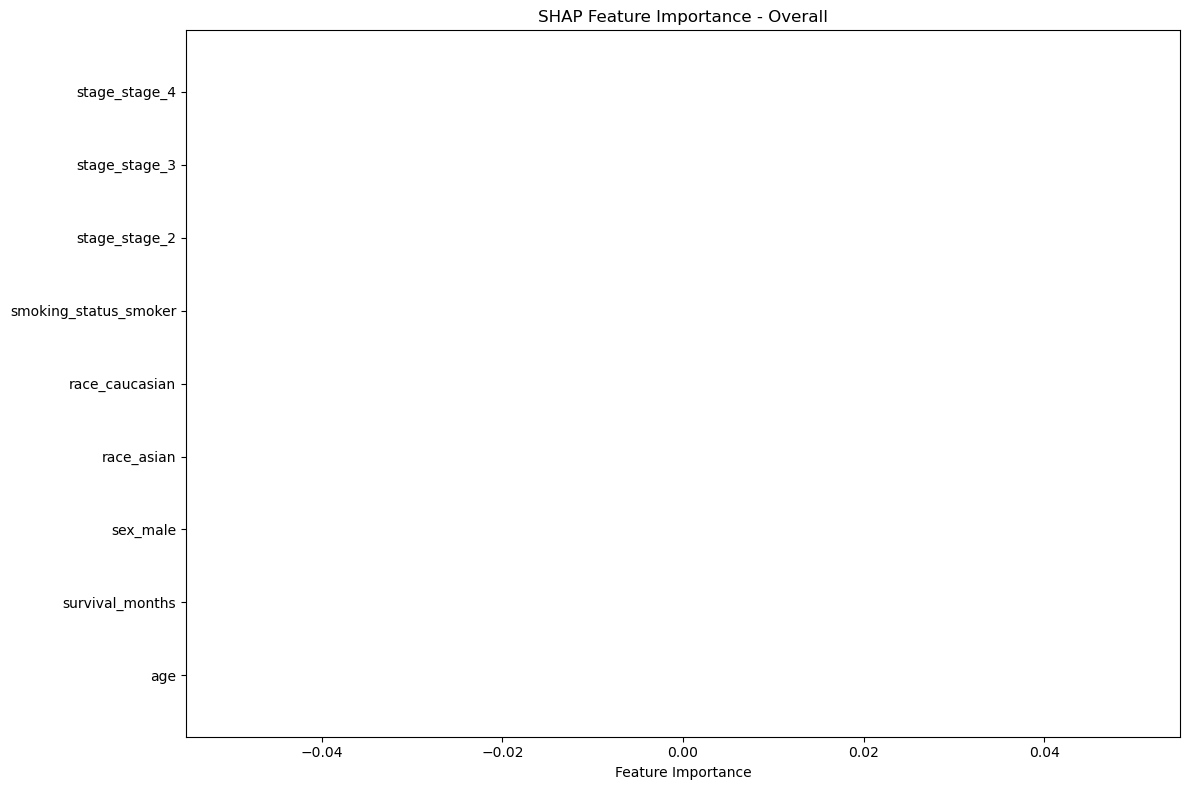


Top 5 features driving overall differences (SHAP):
           Feature  Importance
0              age         0.0
1  survival_months         0.0
2         sex_male         0.0
3       race_asian         0.0
4   race_caucasian         0.0


In [132]:
# Analyze cluster transitions
transition_results = analyze_cluster_transitions(
    tsne_clusters=tsne_clusters,
    gmm_clusters=gmm_clusters,
    dbscan_clusters=dbscan_clusters,
    feature_names=feature_names,
    X=X_processed
)